In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from google.colab import data_table
#data_table.enable_dataframe_formatter()
#data_table.disable_dataframe_formatter()

# https://www.reddit.com/r/learnpython/comments/co8tsh/making_choropleths_with_plotly_help_installing/
!pip install geopandas
!pip install mapclassify
!git clone https://github.com/gerrymandr/gdbc.git
!pip install plotly
!pip install plotly-geo
!pip install pyshp
# Runtime -> restart runtime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 40.4 MB/s 
     |████████████████████████████████| 6.3 MB 44.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'gdbc'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 369 (delta 29), reused 45 (delta 10), pack-reused 259
Receiving objects: 100% (369/369), 7.96 MiB | 31.24 MiB/s, done.
Resolving deltas: 100% (78/78), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.7 MB 1.1 MB/s 
Looking in indexes: https://pypi.org/simp

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import gc
import subprocess

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import folium
import plotly.figure_factory as ff
from google.colab import files

In [ ]:
# Selected party Variables
'''
CASE_ID
PARTY_NUMBER
PARTY_TYPE
AT_FAULT
PARTY_SEX
PARTY_AGE
PARTY_SOBRIETY
PARTY_DRUG_PHYSICAL
PARTY_SAFETY_EQUIP_
PARTY_SAFETY_EQUIP_2
FINAN_RESPONS
SP_INFO_2
OAF_VIOL_CAT
OAF_
MOVE_PRE_ACC
VEHICLE_YEAR
VEHICLE_MAKE
STWD_VEHICLE_TYPE
CHP_VEH_TYPE_TOWING
RACE
'''

In [ ]:
# Dropped Variables
"""
Collision Records

Jurisdiction                    JURIS
City Division LAPD              CITY_DIVISION_LAPD
Ped Action                      PED_ACTION
Road Surface                    ROAD_SURFACE
Road Condition 1                ROAD_COND_1
Road Condition 2                ROAD_COND_2
Pedestrian Collision            PEDESTRIAN_ACCIDENT
Bicycle Collision               BICYCLE_ACCIDENT
Motorcycle Collision            MOTORCYCLE_ACCIDENT
Truck Collision                 TRUCK_ACCIDENT

Party Records

Party Safety Equipment 2        PARTY_SAFETY_EQUIP_2
Financial Responsibility        FINAN_RESPONS
Other Associated Factor 1       OAF_1
Movement Preceding Collision    ??? SEE MOVE_PRE_ACC ??? Be careful
CHP Vehicle Type Towing         CHP_VEH_TYPE_TOWING
CHP Vehicle Type Towed          CHP_VEH_TYPE_TOWED
"""

In [ ]:
pd.set_option('display.max_columns', None)
collision_ = "collision_"
party_ = "party_"
join_ = "join_"

###############################################################################################################################
##########################################  Collision Records  ################################################################
###############################################################################################################################

def file_prep(filename):
    # unziping the data, producing collision dataframes based on years and selecting the relevant columns
    #!unzip "/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/SWITRS_2010.zip" -d "/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2010"
    collision_ = pd.read_csv(filename, sep = ",")
    collision_ = collision_[["CASE_ID", "ACCIDENT_YEAR", "COLLISION_DATE", "COLLISION_TIME", "DAY_OF_WEEK", "POPULATION", "CNTY_CITY_LOC",
                             "SPECIAL_COND", "CHP_BEAT_TYPE", "DIRECTION", "INTERSECTION", "WEATHER_1", "STATE_HWY_IND", "LOCATION_TYPE",
                             "RAMP_INTERSECTION", "SIDE_OF_HWY", "COLLISION_SEVERITY", "NUMBER_KILLED", "NUMBER_INJURED", "PARTY_COUNT",
                             "PRIMARY_COLL_FACTOR", "PCF_VIOL_CATEGORY", "TYPE_OF_COLLISION", "MVIW", "LIGHTING", "CONTROL_DEVICE", "ALCOHOL_INVOLVED",
                             "PRIMARY_RAMP", "SECONDARY_RAMP", "LATITUDE", "LONGITUDE"]]
    return collision_

collision_2010 = file_prep('/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2010.csv')
collision_2011 = file_prep("/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2011.csv")
collision_2012 = file_prep("/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2012.csv")
collision_2013 = file_prep('/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2013.csv')
collision_2014 = file_prep('/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2014.csv')
collision_2015 = file_prep('/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2015.csv')
collision_2016 = file_prep('/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2016.csv')
collision_2017 = file_prep('/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2017.csv')

collision_2018 = file_prep('/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2018.csv')
collision_2018["COLLISION_SEVERITY"].replace({"N": 100}, inplace = True)
collision_2018['COLLISION_SEVERITY'] = collision_2018['COLLISION_SEVERITY'].astype(int)

collision_2019 = file_prep('/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2019.csv')
collision_2020 = file_prep('/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2020.csv')
collision_2021 = file_prep('/content/drive/MyDrive/Anil 2022/CollisionRecords/CollisionRecords/CollisionRecords_2021.csv')

def concat(collision_):
    # Concatenating collision dataframes to one dataframe
    frames = [collision_2010, collision_2011, collision_2012, collision_2013, collision_2014, collision_2015, collision_2016, collision_2017,
            collision_2018, collision_2019, collision_2020, collision_2021]
    collision_ = pd.concat(frames)
    return collision_

collision_2010_2021 = concat(collision_)

def populaton(population_):
  # Genearting a new variable called POPULATION_CAT based on the number of the population
  if population_ == 1:
    return "< 25000"
  elif population_ >= 2 and population_ <= 5:
    return "25000 - 100000"
  elif population_ == 6:
    return "100000 - 250000"
  elif population_ == 7:
    return "> 250000"
  elif population_ == 9:
    return "Rural"
  elif population_ == 0:
    return "University/PrivateProperty"

collision_2010_2021['POPULATION_CAT'] = collision_2010_2021.POPULATION.apply(populaton)

###################################################################################################################################
###################################################  Party Records  ###############################################################
###################################################################################################################################

def file_prep(filename):
    # unziping the data, producing collision dataframes based on years and selecting the relevant columns
    #!unzip "/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/SWITRS_2010.zip" -d "/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2010"
    party_ = pd.read_csv(filename, sep = ",")
    party_ = party_[["CASE_ID", "PARTY_NUMBER", "PARTY_TYPE", "AT_FAULT", "PARTY_SEX", "PARTY_AGE", "PARTY_SOBRIETY", "PARTY_DRUG_PHYSICAL",
                     "PARTY_SAFETY_EQUIP_1", "SP_INFO_2", "OAF_VIOL_CAT", "VEHICLE_YEAR", "VEHICLE_MAKE", "STWD_VEHICLE_TYPE", "RACE"]]
    return party_

party_2010 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2010/PartyRecords.txt")
party_2011 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2011/PartyRecords.txt")
party_2012 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2012/PartyRecords.txt")
party_2013 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2013/PartyRecords.txt")
party_2014 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2014/PartyRecords.txt")
party_2015 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2015/PartyRecords.txt")
party_2016 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2016/PartyRecords.txt")
party_2017 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2017/PartyRecords.txt")
party_2018 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2017/PartyRecords.txt")
party_2019 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2018/PartyRecords.txt")
party_2020 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2020/PartyRecords.txt")
party_2021 = file_prep("/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2021/PartyRecords.txt")

def concat(party_):
    # Concatenating collision dataframes to one dataframe
    frames = [party_2010, party_2011, party_2012, party_2013, party_2014, party_2015, party_2016, party_2017,
            party_2018, party_2019, party_2020, party_2021]
    party_ = pd.concat(frames)
    return party_

party_2010_2021 = concat(party_)

##################################################################################################################################
################################################### Victim RECORDS ###############################################################
##################################################################################################################################

pd.set_option('display.max_columns', None)
victim_ = "victim_"
filename_ = "filename_"

def file_prep(filename_):
    # unziping the data, producing victim dataframes based on years and selecting the relevant columns
    #!unzip "/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/SWITRS_2010.zip" -d "/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2010"
    victim_ = pd.read_csv(filename_, sep = ",")
    victim_ = victim_[["CASE_ID", "PARTY_NUMBER", "VICTIM_ROLE", "VICTIM_SEX", "VICTIM_AGE", "VICTIM_DEGREE_OF_INJURY", "VICTIM_SAFETY_EQUIP_1"]]
    return victim_

victim_2010 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2010/VictimRecords.txt')
victim_2011 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2011/VictimRecords.txt')
victim_2012 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2012/VictimRecords.txt')
victim_2013 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2013/VictimRecords.txt')
victim_2014 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2014/VictimRecords.txt')
victim_2015 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2015/VictimRecords.txt')
victim_2016 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2016/VictimRecords.txt')
victim_2017 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2017/VictimRecords.txt')
victim_2018 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2018/VictimRecords.txt')
victim_2019 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2019/VictimRecords.txt')
victim_2020 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2020/VictimRecords.txt')
victim_2021 = file_prep('/content/drive/MyDrive/Anil 2022/SWITRS_2010_2021/unziped/2021/VictimRecords.txt')


def concat(victim_):
    # Concatenating collision dataframes to one dataframe
    frames = [victim_2010, victim_2011, victim_2012, victim_2013, victim_2014, victim_2015, victim_2016,
              victim_2017, victim_2018, victim_2019, victim_2020, victim_2021]
    victim_ = pd.concat(frames)
    return victim_

victim_2010_2021 = concat(victim_)

##################################################################################################################################
################################################### MERGING COLLISION AND PARTY RECORDS ##########################################
##################################################################################################################################


# merging collision_2010_2021 and party_2010_2021 with an inner join based on CASE_ID
def merge_(join_):
  join_ = pd.merge(collision_2010_2021, party_2010_2021, on = 'CASE_ID')
  return join_
SWIFTR_2010_2020 = merge_(join_)

def merge_(join_):
  join_ = pd.merge(SWIFTR_2010_2020, victim_2010_2021, on = 'CASE_ID')
  return join_
SWIFTR_2010_2020 = merge_(join_)


In [ ]:
# SWIFTR_2010_2020.isna().sum()

CASE_ID                          0
ACCIDENT_YEAR                    0
COLLISION_DATE                   0
COLLISION_TIME                   0
DAY_OF_WEEK                      0
POPULATION                       0
CNTY_CITY_LOC                    0
SPECIAL_COND                     0
CHP_BEAT_TYPE                    0
DIRECTION                  3140329
INTERSECTION                     0
WEATHER_1                        0
STATE_HWY_IND                 6073
LOCATION_TYPE              8044981
RAMP_INTERSECTION          8044981
SIDE_OF_HWY                8044999
COLLISION_SEVERITY               0
NUMBER_KILLED                    0
NUMBER_INJURED                   0
PARTY_COUNT                      0
PRIMARY_COLL_FACTOR              0
PCF_VIOL_CATEGORY                0
TYPE_OF_COLLISION                0
MVIW                             0
LIGHTING                         0
CONTROL_DEVICE                   0
ALCOHOL_INVOLVED           9548230
PRIMARY_RAMP                     0
SECONDARY_RAMP      

In [ ]:
# What if missing valueas are dropped
# SWIFTR_2010_2020 = SWIFTR_2010_2020.dropna()

In [ ]:
# Dropped Missing values
# SWIFTR_2010_2020.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103580 entries, 0 to 10479169
Data columns (total 52 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CASE_ID                  103580 non-null  int64  
 1   ACCIDENT_YEAR            103580 non-null  int64  
 2   COLLISION_DATE           103580 non-null  int64  
 3   COLLISION_TIME           103580 non-null  int64  
 4   DAY_OF_WEEK              103580 non-null  int64  
 5   POPULATION               103580 non-null  int64  
 6   CNTY_CITY_LOC            103580 non-null  int64  
 7   SPECIAL_COND             103580 non-null  int64  
 8   CHP_BEAT_TYPE            103580 non-null  object 
 9   DIRECTION                103580 non-null  object 
 10  INTERSECTION             103580 non-null  object 
 11  WEATHER_1                103580 non-null  object 
 12  STATE_HWY_IND            103580 non-null  object 
 13  LOCATION_TYPE            103580 non-null  object 
 14  RA

In [ ]:
# THIS IS THE RELEVANT ONE
'''
for dtype in ['float','int','object']:
    selected_dtype = SWIFTR_2010_2020.select_dtypes(include = [dtype])
    mean_usage_b = selected_dtype.memory_usage(deep = True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype, mean_usage_mb))
'''

Average memory usage for float columns: 0.79 MB
Average memory usage for int columns: 0.79 MB
Average memory usage for object columns: 5.56 MB


In [ ]:
# KAGGLE TIPS -> DATASETS
# https://www.kaggle.com/code/pavansanagapati/14-simple-tips-to-save-ram-memory-for-1-gb-dataset/notebook#Technique-12:-Memory-Profiler

In [ ]:
# THIS IS THE RELEVANT ONE
SWIFTR_2010_2020.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10491294 entries, 0 to 10491293
Data columns (total 52 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CASE_ID                  int64  
 1   ACCIDENT_YEAR            int64  
 2   COLLISION_DATE           int64  
 3   COLLISION_TIME           int64  
 4   DAY_OF_WEEK              int64  
 5   POPULATION               int64  
 6   CNTY_CITY_LOC            int64  
 7   SPECIAL_COND             int64  
 8   CHP_BEAT_TYPE            object 
 9   DIRECTION                object 
 10  INTERSECTION             object 
 11  WEATHER_1                object 
 12  STATE_HWY_IND            object 
 13  LOCATION_TYPE            object 
 14  RAMP_INTERSECTION        object 
 15  SIDE_OF_HWY              object 
 16  COLLISION_SEVERITY       int64  
 17  NUMBER_KILLED            int64  
 18  NUMBER_INJURED           int64  
 19  PARTY_COUNT              object 
 20  PRIMARY_COLL_FACTOR      object 
 21  PCF_VI

In [ ]:
# THIS IS THE RELEVANT ONE
for dtype in ['float','int','object']:
    selected_dtype = SWIFTR_2010_2020.select_dtypes(include = [dtype])
    mean_usage_b = selected_dtype.memory_usage(deep = True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype, mean_usage_mb))

Average memory usage for float columns: 80.04 MB
Average memory usage for int columns: 80.04 MB
Average memory usage for object columns: 530.69 MB


In [ ]:
int_types = ["uint8", "int8", "int16"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [ ]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)
gl_int = SWIFTR_2010_2020.select_dtypes(include=['int'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')
print(mem_usage(gl_int))
print(mem_usage(converted_int))
compare_ints = pd.concat([gl_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['Before','After']
compare_ints.apply(pd.Series.value_counts)

1698.76 MB
618.19 MB


Before  After
uint8      NaN   10.0
uint16     NaN    5.0
uint32     NaN    2.0
int64     17.0    NaN

In [ ]:
gl_float = SWIFTR_2010_2020.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')
print(mem_usage(gl_float))
print(mem_usage(converted_float))
compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['Before','After']
compare_floats.apply(pd.Series.value_counts)

312.01 MB
195.00 MB


Before  After
float32     NaN    3.0
float64     3.0    NaN

In [ ]:
optimized_SWIFTR_2010_2020 = SWIFTR_2010_2020.copy()
optimized_SWIFTR_2010_2020[converted_int.columns] = converted_int
optimized_SWIFTR_2010_2020[converted_float.columns] = converted_float
print(mem_usage(SWIFTR_2010_2020))
print(mem_usage(optimized_SWIFTR_2010_2020))

24529.54 MB
23622.76 MB


In [ ]:
from sys import getsizeof
s1 = 'In progress'
s2 = 'memory consumption'
s3 = 'Objects in python is fun!'
s4 = 'Numerics consume less memory!'
for s in [s1, s2, s3, s4]:
    print(getsizeof(s))

60
67
74
78


In [ ]:
obj_ser = pd.Series(['In progress',
    'memory consumption',
    'Objects in python is fun!',
    'Numerics consume less memory!'])
obj_ser.apply(getsizeof)

0    60
1    67
2    74
3    78
dtype: int64

In [ ]:
SWIFTR_2010_2020_obj = SWIFTR_2010_2020.select_dtypes(include=['object']).copy()
SWIFTR_2010_2020_obj.describe()

In [ ]:
# https://medium.com/@dataproducts/pandas-detect-mixed-data-types-and-fix-it-7f0bd3b8d071 SEE HOW TO HANLDE MIXED-TYPES
# https://www.w3resource.com/python-exercises/pandas/python-pandas-data-frame-exercise-76.php
for column in SWIFTR_2010_2020.columns:
    # Gets the column name and the type
    print(f'Column {column}: Type {pd.api.types.infer_dtype(SWIFTR_2010_2020[column])}')

Column CASE_ID: Type integer
Column ACCIDENT_YEAR: Type integer
Column COLLISION_DATE: Type integer
Column COLLISION_TIME: Type integer
Column DAY_OF_WEEK: Type integer
Column POPULATION: Type integer
Column CNTY_CITY_LOC: Type integer
Column SPECIAL_COND: Type integer
Column CHP_BEAT_TYPE: Type mixed-integer
Column DIRECTION: Type string
Column INTERSECTION: Type string
Column WEATHER_1: Type string
Column STATE_HWY_IND: Type string
Column LOCATION_TYPE: Type string
Column RAMP_INTERSECTION: Type mixed
Column SIDE_OF_HWY: Type string
Column COLLISION_SEVERITY: Type integer
Column NUMBER_KILLED: Type integer
Column NUMBER_INJURED: Type integer
Column PARTY_COUNT: Type mixed-integer
Column PRIMARY_COLL_FACTOR: Type string
Column PCF_VIOL_CATEGORY: Type mixed-integer
Column TYPE_OF_COLLISION: Type string
Column MVIW: Type string
Column LIGHTING: Type string
Column CONTROL_DEVICE: Type string
Column ALCOHOL_INVOLVED: Type string
Column PRIMARY_RAMP: Type string
Column SECONDARY_RAMP: Type

In [ ]:
SWIFTR_2010_2020

CASE_ID  ACCIDENT_YEAR  COLLISION_DATE  COLLISION_TIME  DAY_OF_WEEK  \
0         4392005           2010        20100119             120            2   
1         4392005           2010        20100119             120            2   
2         4392006           2010        20100113             426            3   
3         4392006           2010        20100113             426            3   
4         4392006           2010        20100113             426            3   
...           ...            ...             ...             ...          ...   
10491289  9417938           2021        20210918            1927            6   
10491290  9417938           2021        20210918            1927            6   
10491291  9417938           2021        20210918            1927            6   
10491292  9417940           2021        20211120            1845            6   
10491293  9417940           2021        20211120            1845            6   

          POPULATION  CNTY_CITY_LOC  SPECIAL_COND CHP_BEAT_TYPE DIRECTION  \
0                  9           3300             0             3         W   
1                  9           3300             0             3         W   
2                  5           1935             0             0       NaN   
3                  5           1935             0             0       NaN   
4                  5           1935             0             0       NaN   
...              ...            ...           ...           ...       ...   
10491289           6           2708             0             0       NaN   
10491290           6           2708             0             0       NaN   
10491291           6           2708             0             0       NaN   
10491292           6           2708             0             0         N   
10491293           6           2708             0             0         N   

         INTERSECTION WEATHER_1 STATE_HWY_IND LOCATION_TYPE RAMP_INTERSECTION  \
0                   N         B             Y             H                 -   
1                   N         B             Y             H                 -   
2                   Y         C             N           NaN               NaN   
3                   Y         C             N           NaN               NaN   
4                   Y         C             N           NaN               NaN   
...               ...       ...           ...           ...               ...   
10491289            Y         A             N           NaN               NaN   
10491290            Y         A             N           NaN               NaN   
10491291            Y         A             N           NaN               NaN   
10491292            N         A             N           NaN               NaN   
10491293            N         A             N           NaN               NaN   

         SIDE_OF_HWY  COLLISION_SEVERITY  NUMBER_KILLED  NUMBER_INJURED  \
0                  E                   1              1               1   
1                  E                   1              1               1   
2                NaN                   1              1               1   
3                NaN                   1              1               1   
4                NaN                   1              1               1   
...              ...                 ...            ...             ...   
10491289         NaN                   3              0               2   
10491290         NaN                   3              0               2   
10491291         NaN                   3              0               2   
10491292         NaN                   2              0               1   
10491293         NaN                   2              0               1   

         PARTY_COUNT PRIMARY_COLL_FACTOR PCF_VIOL_CATEGORY TYPE_OF_COLLISION  \
0                  1                   A                08                 E   
1                  1                   A                08                 E  

In [ ]:
SWIFTR_2010_2020.loc[SWIFTR_2010_2020['CASE_ID'] == 4392005]

CASE_ID  ACCIDENT_YEAR  COLLISION_DATE  COLLISION_TIME  DAY_OF_WEEK  \
0  4392005           2010        20100119             120            2   
1  4392005           2010        20100119             120            2   

   POPULATION  CNTY_CITY_LOC  SPECIAL_COND CHP_BEAT_TYPE DIRECTION  \
0           9           3300             0             3         W   
1           9           3300             0             3         W   

  INTERSECTION WEATHER_1 STATE_HWY_IND LOCATION_TYPE RAMP_INTERSECTION  \
0            N         B             Y             H                 -   
1            N         B             Y             H                 -   

  SIDE_OF_HWY  COLLISION_SEVERITY  NUMBER_KILLED  NUMBER_INJURED PARTY_COUNT  \
0           E                   1              1               1           1   
1           E                   1              1               1           1   

  PRIMARY_COLL_FACTOR PCF_VIOL_CATEGORY TYPE_OF_COLLISION MVIW LIGHTING  \
0                   A                08                 E    I        C   
1                   A                08                 E    I        C   

  CONTROL_DEVICE ALCOHOL_INVOLVED PRIMARY_RAMP SECONDARY_RAMP  LATITUDE  \
0              D                Y            -              -  34.01847   
1              D                Y            -              -  34.01847   

   LONGITUDE POPULATION_CAT  PARTY_NUMBER_x PARTY_TYPE AT_FAULT PARTY_SEX  \
0  117.50958          Rural               1          1        Y         F   
1  117.50958          Rural               1          1        Y         F   

   PARTY_AGE PARTY_SOBRIETY PARTY_DRUG_PHYSICAL PARTY_SAFETY_EQUIP_1  \
0         33              B                   E                    L   
1         33              B                   E                    L   

  SP_INFO_2 OAF_VIOL_CAT  VEHICLE_YEAR VEHICLE_MAKE STWD_VEHICLE_TYPE RACE  \
0         3           -         1993.0       TOYOTA                 A    B   
1         3           -         1993.0       TOYOTA                 A    B   

   PARTY_NUMBER_y  VICTIM_ROLE VICTIM_SEX  VICTIM_AGE  \
0               1            1          F          33   
1               1            2          M          16   

   VICTIM_DEGREE_OF_INJURY VICTIM_SAFETY_EQUIP_1  
0                        1                     L  
1                        4                     P

In [ ]:
dataframe_ = "dataframe_"

def case_id_check(dataframe_):
  dataframe_ = SWIFTR_2010_2020.loc[SWIFTR_2010_2020['CASE_ID'] == 4392005]
  CASE_ID_4392005 = dataframe_
  # CASE_ID_4392005.to_csv(r'/content/drive/MyDrive/Anil 2022/CASE_ID_4392005.csv', index = False)

CASE_ID_4392005 = case_id_check(dataframe_)

In [ ]:
# CASE_ID = 4392005
# VICTIM_ROLE = 1 - Driver
# VICTIM_ROLE = 2 - Passenger (includes non-operator on bicycle or any victim on/in parked vehicle or multiple victims on/in non-motor vehicle)
# FOR BOTCH PARTIES
# TYPE_OF_COLLISION = E - Hit Object
# TYPE_OF_COLLISION = E - Hit Object

In [ ]:
SWIFTR_2010_2020.loc[SWIFTR_2010_2020['JURIS'] == "1942"]

CASE_ID  ACCIDENT_YEAR JURIS  COLLISION_DATE  COLLISION_TIME  \
6         4392007           2010  1942        20100115             400   
7         4392007           2010  1942        20100115             400   
8         4392008           2010  1942        20100103            1405   
9         4392008           2010  1942        20100103            1405   
10        4392008           2010  1942        20100103            1405   
...           ...            ...   ...             ...             ...   
10488271  9404888           2021  1942        20211121             555   
10488272  9404888           2021  1942        20211121             555   
10488273  9404888           2021  1942        20211121             555   
10488274  9404888           2021  1942        20211121             555   
10488275  9404888           2021  1942        20211121             555   

          DAY_OF_WEEK  POPULATION  CNTY_CITY_LOC  SPECIAL_COND CHP_BEAT_TYPE  \
6                   5           7           1942             0             0   
7                   5           7           1942             0             0   
8                   7           7           1942             0             0   
9                   7           7           1942             0             0   
10                  7           7           1942             0             0   
...               ...         ...            ...           ...           ...   
10488271            7           7           1942             0             0   
10488272            7           7           1942             0             0   
10488273            7           7           1942             0             0   
10488274            7           7           1942             0             0   
10488275            7           7           1942             0             0   

         CITY_DIVISION_LAPD DIRECTION INTERSECTION WEATHER_1 STATE_HWY_IND  \
6                         E         N            N         A             N   
7                         E         N            N         A             N   
8                         E       NaN            Y         B             N   
9                         E       NaN            Y         B             N   
10                        E       NaN            Y         B             N   
...                     ...       ...          ...       ...           ...   
10488271                NaN         N            N         A             N   
10488272                NaN         N            N         A             N   
10488273                NaN         N            N         A             N   
10488274                NaN         N            N         A             N   
10488275                NaN         N            N         A             N   

         LOCATION_TYPE RAMP_INTERSECTION SIDE_OF_HWY  COLLISION_SEVERITY  \
6                  NaN               NaN         NaN                   1   
7                  NaN               NaN         NaN                   1   
8                  NaN               NaN         NaN                   1   
9                  NaN               NaN         NaN                   1   
10                 NaN               NaN         NaN                   1   
...                ...               ...         ...                 ...   
10488271           NaN               NaN         NaN                   4   
10488272           NaN               NaN         NaN                   4   
10488273           NaN               NaN         NaN                   4   
10488274           NaN               NaN         NaN                   4   
10488275           NaN               NaN         NaN                   4   

          NUMBER_KILLED  NUMBER_INJURED PARTY_COUNT PRIMARY_COLL_FACTOR  \
6                     1               0           2                   A   
7                     1               0           2                   A   
8                     1               0           3                   A   
9         

**STATE WIDE VEHICLE TYPE VS ACCIDENT YEAR**

> Indented block



In [ ]:
c_tab = "c_tab"

def cross_tab(c_tab):
  # cross tabulate relation between ACCIDENT_YEAR and state wide vehicle type STWD_VEHICLE_TYPE
  c_tab = pd.crosstab(index = SWIFTR_2010_2020['STWD_VEHICLE_TYPE'], columns = SWIFTR_2010_2020['ACCIDENT_YEAR'])
  return c_tab
df_cross = cross_tab(c_tab)
df_cross

# F - TRUCK OR TRUCK TRACTOR
# G - TRUCK/TRUCK TRACTOR WITH TRAILER

ACCIDENT_YEAR        2010    2011    2012    2013    2014    2015    2016  \
STWD_VEHICLE_TYPE                                                           
-                   89636   80075   77955   71205   71206   72644   75597   
04                      0       0       0       0       0       0       0   
A                  674425  679286  666578  664666  691184  773367  863074   
B                    1734    1823    1666    1233    1233    1204    1193   
C                   15512   17020   17881   18754   19279   21643   22939   
D                  105697  101515   95423   93273   92126  102154  112473   
E                    3626    3551    3316    3573    3395    3689    4454   
F                    7053    7438    7455    7749    8075    8819    9414   
G                    9688    9501    9562    9708   10248   10727   12101   
H                    4614    4696    5372    5437    4984    5863    6980   
I                    8992    9000    8350    7936    8651    8686    9501   
J                    6270    6372    5987    5643    6099    6134    6478   
K                     218     185     169     107     107     160     195   
L                   16276   17756   17958   17314   16973   16610   15061   
M                    1989    1911    1770    1696    1739    2000    2237   
N                   19587   20177   20483   19081   20035   20381   21991   
O                      77     100     113     109     227     153     135   

ACCIDENT_YEAR         2017    2018    2020    2021  
STWD_VEHICLE_TYPE                                   
-                   113782   48903   29798   26512  
04                       0       2       0       0  
A                  1179688  590470  409185  433550  
B                      942     486     562     882  
C                    37494   18489   13824   14819  
D                   145164   71327   53167   57513  
E                     3734    1959    1811    2229  
F                    13326    6934    5522    6390  
G                    12290    6355    5212    6169  
H                     1358     687     180     236  
I                    10376    5234    2941    2863  
J                    10346    5004    3672    3297  
K                      242     104     103      98  
L                    27808   13587    9534    8793  
M                     2774    1485    1350    1624  
N                    42026   20882   14489   14227  
O                      206     120      99     119

STWD_VEHICLE_TYPE  ACCIDENT_YEAR  COLLISIONS
0                   -           2010       89636
1                   -           2011       80075
2                   -           2012       77955
3                   -           2013       71205
4                   -           2014       71206
..                ...            ...         ...
182                 O           2016         135
183                 O           2017         206
184                 O           2018         120
185                 O           2020          99
186                 O           2021         119

[187 rows x 3 columns]

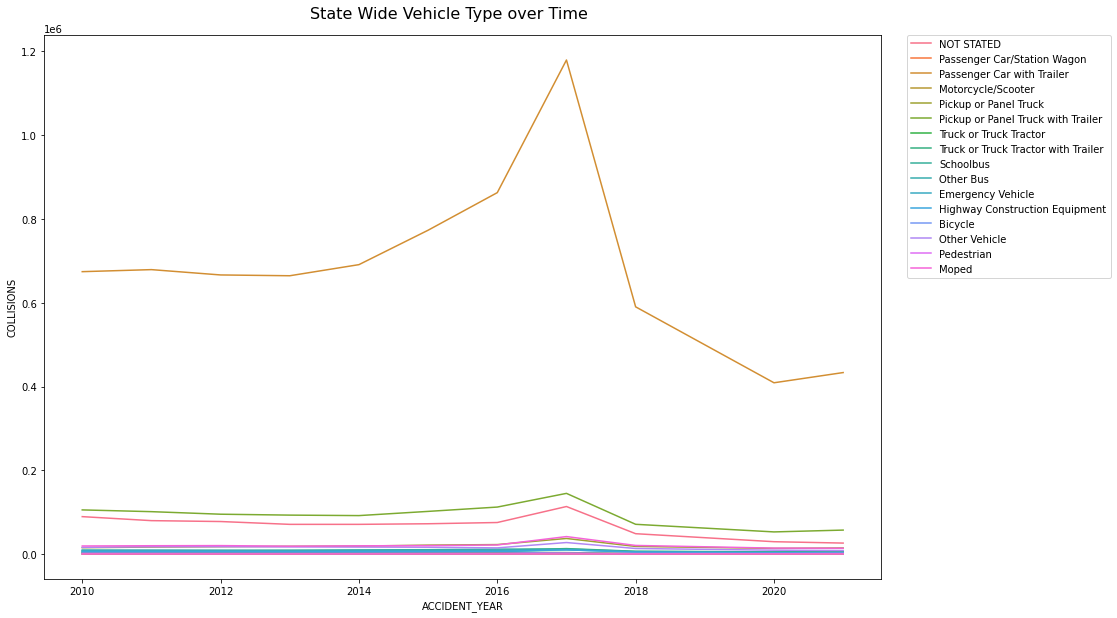

In [ ]:
df_tab = "df_tab"
line_plot = "line_plot"

def pandas_cross_tab(df_tab, line_plot):
  # convert pandas cross tab to pandas dataframe and visualize STWD_VEHICLE_TYPE, ACCIDENT_YEAR, COLLISIONS
  df_tab = df_cross.stack()
  df_tab = pd.DataFrame(data = df_tab)
  df_tab = df_tab.rename(columns={0: "COLLISIONS"})
  df_tab.reset_index(inplace = True)
  plt.figure(figsize = (15, 10))
  plt.suptitle('State Wide Vehicle Type over Time', fontsize = 16, y = .92)
  line_plot = sns.lineplot(x = "ACCIDENT_YEAR", y = "COLLISIONS", hue = "STWD_VEHICLE_TYPE", data = df_tab)
  plt.legend(['NOT STATED', "Passenger Car/Station Wagon", "Passenger Car with Trailer", "Motorcycle/Scooter", "Pickup or Panel Truck"
  , "Pickup or Panel Truck with Trailer", "Truck or Truck Tractor", "Truck or Truck Tractor with Trailer", "Schoolbus", "Other Bus", "Emergency Vehicle",
  "Highway Construction Equipment", "Bicycle", "Other Vehicle", "Pedestrian", "Moped"])
  sns.move_legend(line_plot, "upper right", bbox_to_anchor=(1.28, 1.01))
  sns.color_palette("rocket", as_cmap = True)
  #State_Wide_Vehicle_Type_plot  = line_plot
  #State_Wide_Vehicle_Type_plot = State_Wide_Vehicle_Type_plot.get_figure()
  #State_Wide_Vehicle_Type_plot.savefig(r'/content/drive/MyDrive/Anil 2022/Final Graph Folder/State_Wide_Vehicle_Type_plot.jpg', index = True)
  return df_tab

VEHICLE_TYPE_YEAR = pandas_cross_tab(df_tab, line_plot)
VEHICLE_TYPE_YEAR

In [ ]:
VEHICLE_TYPE_YEAR_1 = VEHICLE_TYPE_YEAR.loc[VEHICLE_TYPE_YEAR['COLLISIONS'] < 50000]
VEHICLE_TYPE_YEAR_1

STWD_VEHICLE_TYPE  ACCIDENT_YEAR  COLLISIONS
8                   -           2018       48903
9                   -           2020       29798
10                  -           2021       26512
11                 04           2010           0
12                 04           2011           0
..                ...            ...         ...
182                 O           2016         135
183                 O           2017         206
184                 O           2018         120
185                 O           2020          99
186                 O           2021         119

[157 rows x 3 columns]

STWD_VEHICLE_TYPE  ACCIDENT_YEAR  COLLISIONS
8                   -           2018       48903
9                   -           2020       29798
10                  -           2021       26512
11                 04           2010           0
12                 04           2011           0
..                ...            ...         ...
182                 O           2016         135
183                 O           2017         206
184                 O           2018         120
185                 O           2020          99
186                 O           2021         119

[157 rows x 3 columns]

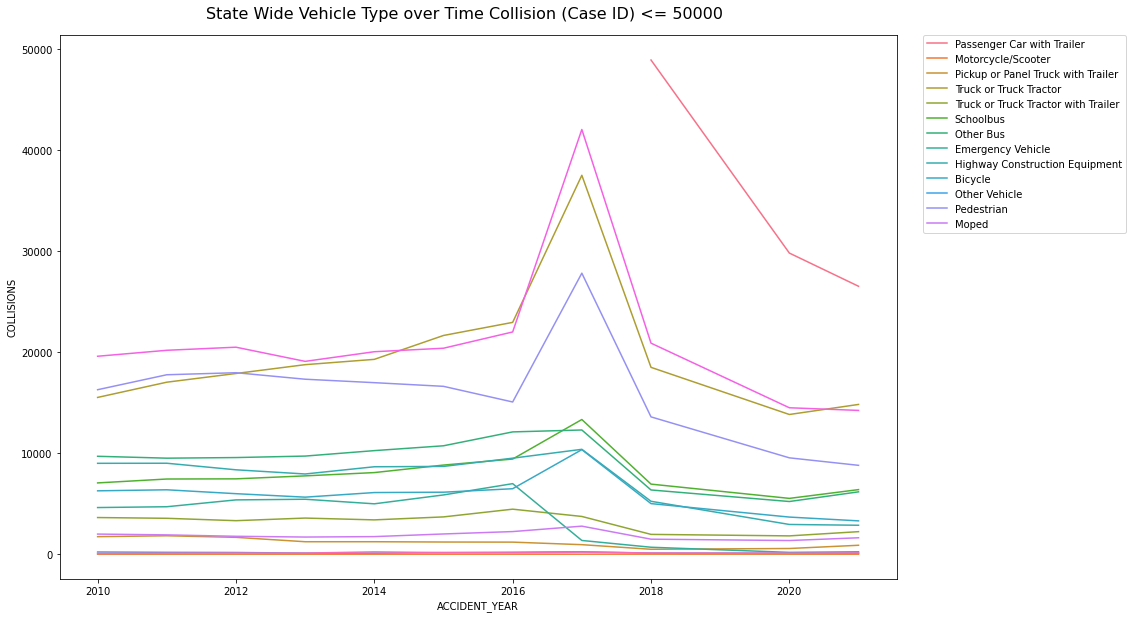

In [ ]:
df_tab = "df_tab"
line_plot = "line_plot"

def pandas_cross_tab(df_tab, line_plot):
  # convert pandas cross tab to pandas dataframe and visualize STWD_VEHICLE_TYPE, ACCIDENT_YEAR, COLLISIONS
  df_tab = VEHICLE_TYPE_YEAR.loc[VEHICLE_TYPE_YEAR['COLLISIONS'] <= 50000]
  df_tab = pd.DataFrame(data = df_tab)
  plt.figure(figsize = (15, 10))
  plt.suptitle('State Wide Vehicle Type over Time Collision (Case ID) <= 50000', fontsize=16, y=.92)
  line_plot = sns.lineplot(x = "ACCIDENT_YEAR", y = "COLLISIONS", hue = "STWD_VEHICLE_TYPE", data = df_tab)
  plt.legend([ "Passenger Car with Trailer", "Motorcycle/Scooter", "Pickup or Panel Truck with Trailer", "Truck or Truck Tractor", "Truck or Truck Tractor with Trailer", "Schoolbus", "Other Bus", "Emergency Vehicle",
  "Highway Construction Equipment", "Bicycle", "Other Vehicle", "Pedestrian", "Moped"])
  sns.move_legend(line_plot, "upper right", bbox_to_anchor=(1.28, 1.01))
  sns.color_palette("rocket", as_cmap = True)
  #State_Wide_Vehicle_Type_plot_1  = line_plot
  #State_Wide_Vehicle_Type_plot_1 = State_Wide_Vehicle_Type_plot_1.get_figure()
  #State_Wide_Vehicle_Type_plot_1.savefig(r'/content/drive/MyDrive/Anil 2022/Final Graph Folder/State_Wide_Vehicle_Type_plot_1.jpg', index = True)
  return df_tab

VEHICLE_TYPE_YEAR_1 = pandas_cross_tab(df_tab, line_plot)
VEHICLE_TYPE_YEAR_1

# ***LUMINANT ANALYTICS CODING***

In [ ]:
c_tab = "c_tab"

def cross_tab(c_tab):
  # cross tabulate relation between ACCIDENT_YEAR and state wide vehicle type STWD_VEHICLE_TYPE
  c_tab = pd.crosstab(index = SWIFTR_2010_2020['STWD_VEHICLE_TYPE'], columns = SWIFTR_2010_2020['ACCIDENT_YEAR'])
  return c_tab
df_cross = cross_tab(c_tab)
df_cross

# F - TRUCK OR TRUCK TRACTOR
# G - TRUCK/TRUCK TRACTOR WITH TRAILER

ACCIDENT_YEAR        2010    2011    2012    2013    2014    2015    2016  \
STWD_VEHICLE_TYPE                                                           
-                   89636   80075   77955   71205   71206   72644   75597   
04                      0       0       0       0       0       0       0   
A                  674425  679286  666578  664666  691184  773367  863074   
B                    1734    1823    1666    1233    1233    1204    1193   
C                   15512   17020   17881   18754   19279   21643   22939   
D                  105697  101515   95423   93273   92126  102154  112473   
E                    3626    3551    3316    3573    3395    3689    4454   
F                    7053    7438    7455    7749    8075    8819    9414   
G                    9688    9501    9562    9708   10248   10727   12101   
H                    4614    4696    5372    5437    4984    5863    6980   
I                    8992    9000    8350    7936    8651    8686    9501   
J                    6270    6372    5987    5643    6099    6134    6478   
K                     218     185     169     107     107     160     195   
L                   16276   17756   17958   17314   16973   16610   15061   
M                    1989    1911    1770    1696    1739    2000    2237   
N                   19587   20177   20483   19081   20035   20381   21991   
O                      77     100     113     109     227     153     135   

ACCIDENT_YEAR         2017    2018    2020    2021  
STWD_VEHICLE_TYPE                                   
-                   113782   48903   29798   26512  
04                       0       2       0       0  
A                  1179688  590470  409185  433550  
B                      942     486     562     882  
C                    37494   18489   13824   14819  
D                   145164   71327   53167   57513  
E                     3734    1959    1811    2229  
F                    13326    6934    5522    6390  
G                    12290    6355    5212    6169  
H                     1358     687     180     236  
I                    10376    5234    2941    2863  
J                    10346    5004    3672    3297  
K                      242     104     103      98  
L                    27808   13587    9534    8793  
M                     2774    1485    1350    1624  
N                    42026   20882   14489   14227  
O                      206     120      99     119

STWD_VEHICLE_TYPE  ACCIDENT_YEAR  COLLISIONS
0                   -           2010       89636
1                   -           2011       80075
2                   -           2012       77955
3                   -           2013       71205
4                   -           2014       71206
..                ...            ...         ...
182                 O           2016         135
183                 O           2017         206
184                 O           2018         120
185                 O           2020          99
186                 O           2021         119

[187 rows x 3 columns]

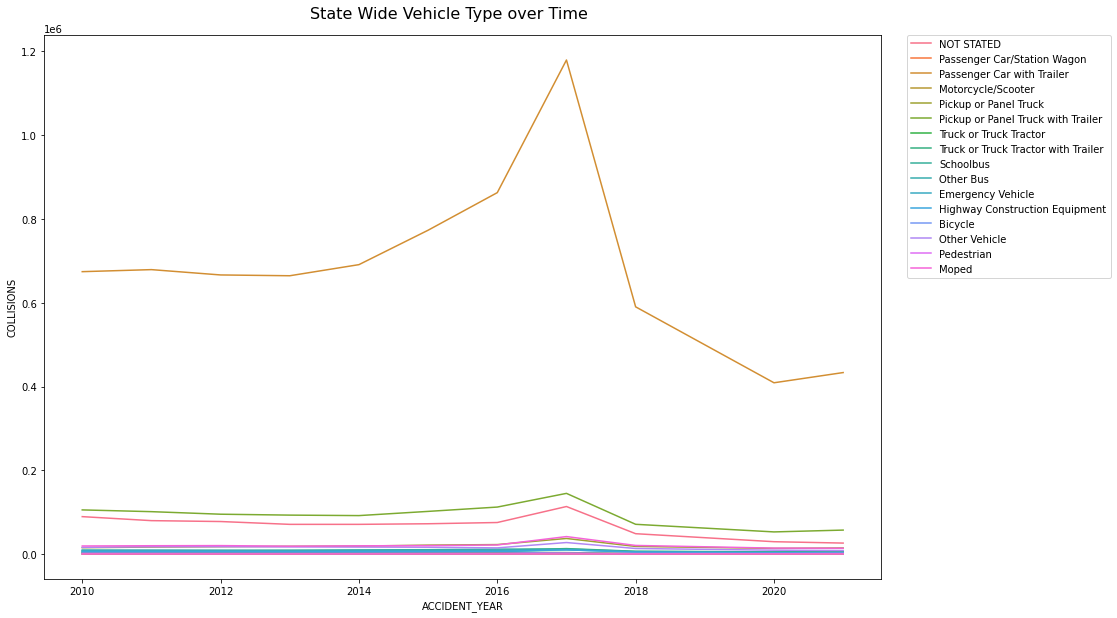

In [ ]:
# LUMINANT ANALYTICS CODING

df_tab = "df_tab"
line_plot = "line_plot"

def pandas_cross_tab(df_tab, line_plot):
  # convert pandas cross tab to pandas dataframe and visualize STWD_VEHICLE_TYPE, ACCIDENT_YEAR, COLLISIONS
  df_tab = df_cross.stack()
  df_tab = pd.DataFrame(data = df_tab)
  df_tab = df_tab.rename(columns={0: "COLLISIONS"})
  df_tab.reset_index(inplace = True)
  plt.figure(figsize = (15, 10))
  plt.suptitle('State Wide Vehicle Type over Time', fontsize=16, y=.92)
  line_plot = sns.lineplot(x = "ACCIDENT_YEAR", y = "COLLISIONS", hue = "STWD_VEHICLE_TYPE", data = df_tab)
  plt.legend(['NOT STATED', "Passenger Car/Station Wagon", "Passenger Car with Trailer", "Motorcycle/Scooter", "Pickup or Panel Truck"
  , "Pickup or Panel Truck with Trailer", "Truck or Truck Tractor", "Truck or Truck Tractor with Trailer", "Schoolbus", "Other Bus", "Emergency Vehicle",
  "Highway Construction Equipment", "Bicycle", "Other Vehicle", "Pedestrian", "Moped"])
  sns.move_legend(line_plot, "upper right", bbox_to_anchor=(1.28, 1.01))
  sns.color_palette("rocket", as_cmap = True)
  #State_Wide_Vehicle_Type_plot  = line_plot
  #State_Wide_Vehicle_Type_plot = State_Wide_Vehicle_Type_plot.get_figure()
  #State_Wide_Vehicle_Type_plot.savefig(r'/content/drive/MyDrive/Anil 2022/Final Graph Folder/State_Wide_Vehicle_Type_plot.jpg', index = True)
  return df_tab

VEHICLE_TYPE_YEAR = pandas_cross_tab(df_tab, line_plot)
VEHICLE_TYPE_YEAR

In [ ]:
VEHICLE_TYPE_YEAR

STWD_VEHICLE_TYPE  ACCIDENT_YEAR  COLLISIONS
0                   -           2010       89636
1                   -           2011       80075
2                   -           2012       77955
3                   -           2013       71205
4                   -           2014       71206
..                ...            ...         ...
182                 O           2016         135
183                 O           2017         206
184                 O           2018         120
185                 O           2020          99
186                 O           2021         119

[187 rows x 3 columns]

In [ ]:
def VEHICLE_TYPE_YEAR_NAMES(name):
    if name == "A" or name == "B":
        return "Passenger Auto"
    elif name == "C" or name == "O":
        return "Motorcycle"
    elif name == "D" or name == "E" or name == "F" or name == "G":
        return "Truck"
    elif name == "H" or name == "I":
        return "Bus"
    elif name == "J" or name == "K":
        return "Other commercial auto"
    elif name == "N":
        return "Pedestrian"
    elif name == "L":
        return "Bicycle"
    elif name == "M":
        return "Other"
    else:
        return "Unknown"


VEHICLE_TYPE_YEAR['STWD_VEHICLE_TYPE'] = VEHICLE_TYPE_YEAR.STWD_VEHICLE_TYPE.apply(VEHICLE_TYPE_YEAR_NAMES)
VEHICLE_TYPE_YEAR

STWD_VEHICLE_TYPE  ACCIDENT_YEAR  COLLISIONS
0             Unknown           2010       89636
1             Unknown           2011       80075
2             Unknown           2012       77955
3             Unknown           2013       71205
4             Unknown           2014       71206
..                ...            ...         ...
182        Motorcycle           2016         135
183        Motorcycle           2017         206
184        Motorcycle           2018         120
185        Motorcycle           2020          99
186        Motorcycle           2021         119

[187 rows x 3 columns]

In [ ]:
VEHICLE_TYPE_YEAR_1 = VEHICLE_TYPE_YEAR

In [ ]:
VEHICLE_TYPE_YEAR_1 = VEHICLE_TYPE_YEAR_1.explode('STWD_VEHICLE_TYPE').pivot_table(index = "ACCIDENT_YEAR",
                                                                                   columns = 'STWD_VEHICLE_TYPE',
                                                                                   values = 'COLLISIONS',
                                                                                   aggfunc = 'sum')

In [ ]:
VEHICLE_TYPE_YEAR_1

STWD_VEHICLE_TYPE  Bicycle    Bus  Motorcycle  Other  Other commercial auto  \
ACCIDENT_YEAR                                                                 
2010                 16276  13606       15589   1989                   6488   
2011                 17756  13696       17120   1911                   6557   
2012                 17958  13722       17994   1770                   6156   
2013                 17314  13373       18863   1696                   5750   
2014                 16973  13635       19506   1739                   6206   
2015                 16610  14549       21796   2000                   6294   
2016                 15061  16481       23074   2237                   6673   
2017                 27808  11734       37700   2774                  10588   
2018                 13587   5921       18609   1485                   5108   
2020                  9534   3121       13923   1350                   3775   
2021                  8793   3099       14938   1624                   3395   

STWD_VEHICLE_TYPE  Passenger Auto  Pedestrian   Truck  Unknown  
ACCIDENT_YEAR                                                   
2010                       676159       19587  126064    89636  
2011                       681109       20177  122005    80075  
2012                       668244       20483  115756    77955  
2013                       665899       19081  114303    71205  
2014                       692417       20035  113844    71206  
2015                       774571       20381  125389    72644  
2016                       864267       21991  138442    75597  
2017                      1180630       42026  174514   113782  
2018                       590956       20882   86575    48905  
2020                       409747       14489   65712    29798  
2021                       434432       14227   72301    26512

In [ ]:
from math import log10, floor


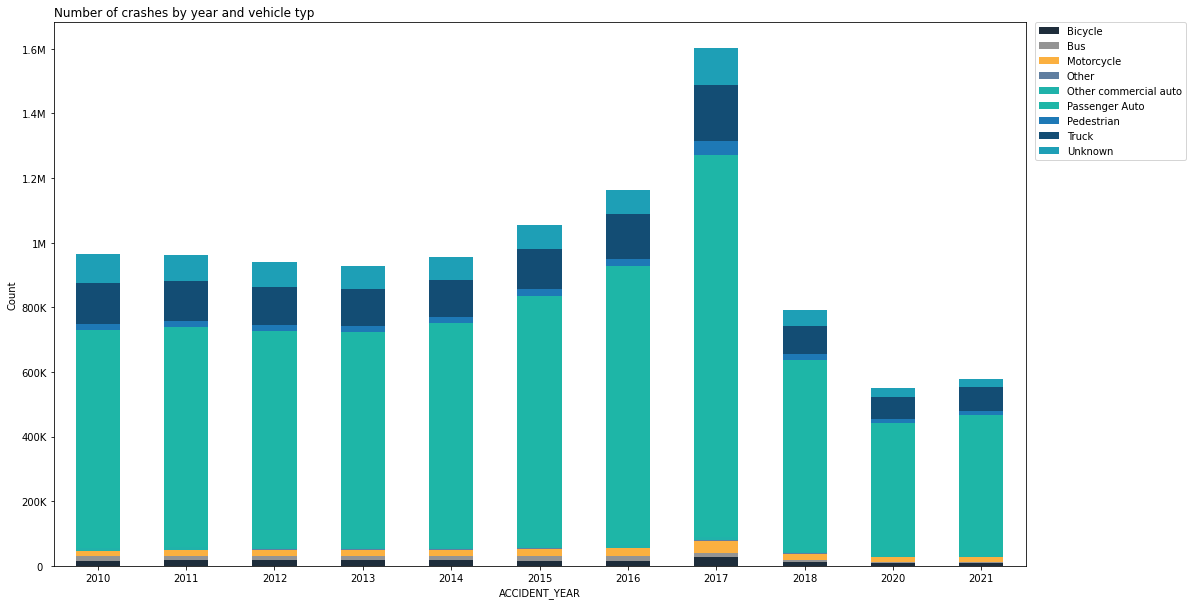

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline


def format_func(value, tick_number = None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)
plt.title('Number of crashes by year and vehicle typ', loc = "left")
ax.ticklabel_format(style = 'plain')
VEHICLE_TYPE_YEAR_1.plot.bar(stacked = True, color = ["#1E2D3B", "#949494", "#FBB040", "#5f7ea0", "#20b2aa", "#1eb6a7", "#1e79b6", "#134d74", "#1e9fb6"], ax = ax)
ax.legend(bbox_to_anchor = (1.17, 1.01))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.xticks(rotation = 360)
plt.ylabel('Count')

plt.show()
plt.savefig('Statewide_year.png', dpi = 1000, bbox_inches = 'tight')

# HEX Dark Grey/Blue #1E2D3B RGB 30 45 59
# HEX Light grey #949494   RGB 148 148 148
# HEX Dark Yellow #FBB040  RGB 251 176 64

In [ ]:
files.download('Statewide_year.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Number of fatal and serious injuries and non serious by year and vehicle type**

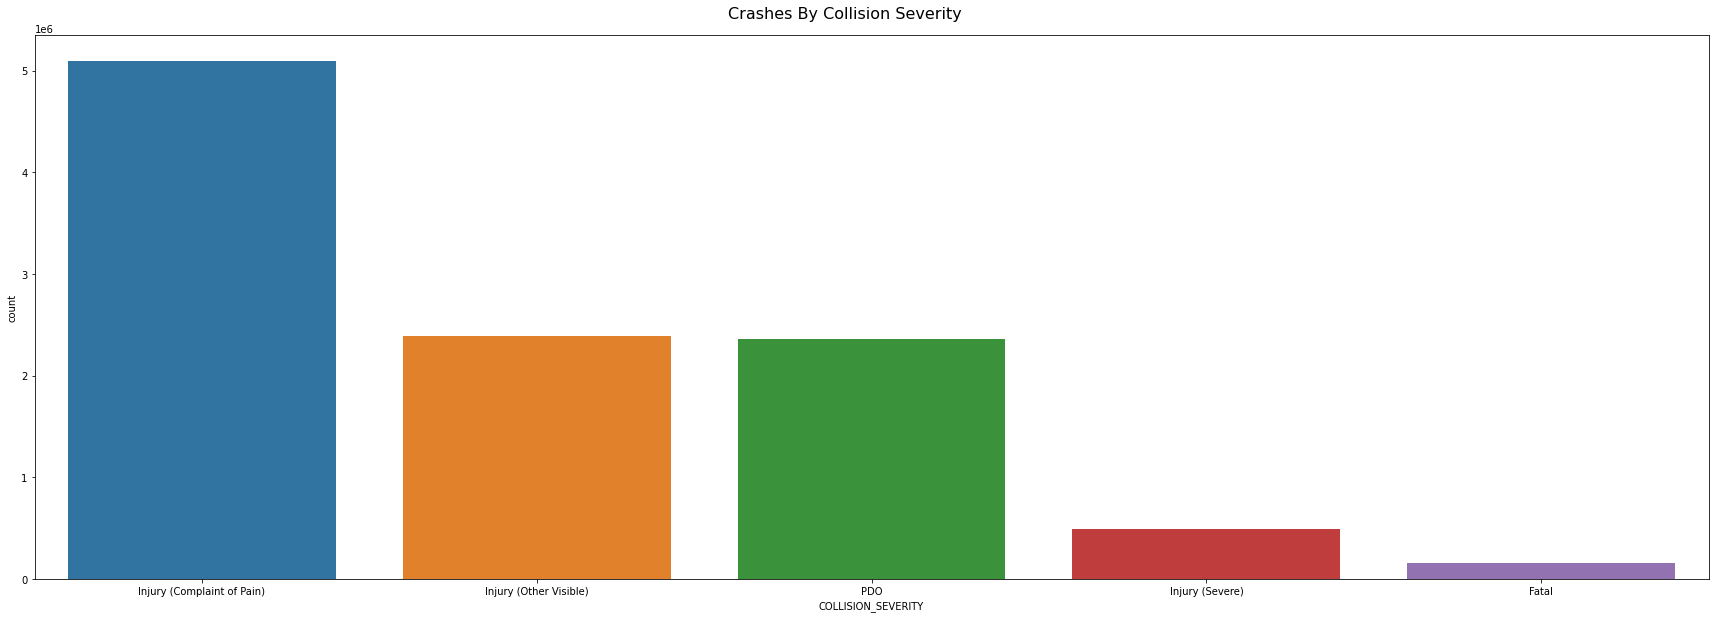

In [ ]:
# 1 - Fatal
# 2 - Injury (Severe)
# 3 - Injury (Other Visible)
# 4 - Injury (Complaint of Pain)
# 0 - PDO
dataframe_ = "dataframe_"
countplot_ = "countplot_"


def CollsionSeverity(dataframe_, countplot_):
    dataframe_ = SWIFTR_2010_2020[['CASE_ID', 'COLLISION_SEVERITY', "ACCIDENT_YEAR", "STWD_VEHICLE_TYPE"]]
    dataframe_['COLLISION_SEVERITY'] = dataframe_['COLLISION_SEVERITY'].replace([1, 2, 3, 4, 0, 100], ["Fatal", "Injury (Severe)", "Injury (Other Visible)",
                                                                             "Injury (Complaint of Pain)", "PDO", "Not Stated"])
    fig, ax = plt.subplots(1, figsize=(30, 10))
    fig.suptitle('Crashes By Collision Severity', fontsize=16, y=.92)
    countplot_ = sns.countplot(x= "COLLISION_SEVERITY", data = dataframe_, order = dataframe_['COLLISION_SEVERITY'].value_counts().index)
    #crash_by_collision_severity_plot = countplot_
    #crash_by_collision_severity_plot = crash_by_collision_severity_plot.get_figure()
    #crash_by_collision_severity_plot.savefig(r'/content/drive/MyDrive/Collision Conditions/crash_by_collision_severity_plot.jpg', index = True)
    return dataframe_

severity_vehicle_type = CollsionSeverity(dataframe_, countplot_)

In [ ]:
severity_vehicle_type

CASE_ID      COLLISION_SEVERITY  ACCIDENT_YEAR STWD_VEHICLE_TYPE
0         4392005                   Fatal           2010    Passenger Auto
1         4392005                   Fatal           2010    Passenger Auto
2         4392006                   Fatal           2010    Passenger Auto
3         4392006                   Fatal           2010    Passenger Auto
4         4392006                   Fatal           2010             Truck
...           ...                     ...            ...               ...
10491289  9417938  Injury (Other Visible)           2021    Passenger Auto
10491290  9417938  Injury (Other Visible)           2021    Passenger Auto
10491291  9417938  Injury (Other Visible)           2021    Passenger Auto
10491292  9417940         Injury (Severe)           2021           Unknown
10491293  9417940         Injury (Severe)           2021           Unknown

[10491294 rows x 4 columns]

In [ ]:
def VEHICLE_TYPE_YEAR_NAMES(name):
    if name == "A" or name == "B":
        return "Passenger Auto"
    elif name == "C" or name == "O":
        return "Motorcycle"
    elif name == "D" or name == "E" or name == "F" or name == "G":
        return "Truck"
    elif name == "H" or name == "I":
        return "Bus"
    elif name == "J" or name == "K":
        return "Other commercial auto"
    elif name == "N":
        return "Pedestrian"
    elif name == "L":
        return "Bicycle"
    elif name == "M":
        return "Other"
    else:
        return "Unknown"


severity_vehicle_type['STWD_VEHICLE_TYPE'] = severity_vehicle_type.STWD_VEHICLE_TYPE.apply(VEHICLE_TYPE_YEAR_NAMES)

In [ ]:
severity_vehicle_type

CASE_ID      COLLISION_SEVERITY  ACCIDENT_YEAR STWD_VEHICLE_TYPE
0         4392005                   Fatal           2010    Passenger Auto
1         4392005                   Fatal           2010    Passenger Auto
2         4392006                   Fatal           2010    Passenger Auto
3         4392006                   Fatal           2010    Passenger Auto
4         4392006                   Fatal           2010             Truck
...           ...                     ...            ...               ...
10491289  9417938  Injury (Other Visible)           2021    Passenger Auto
10491290  9417938  Injury (Other Visible)           2021    Passenger Auto
10491291  9417938  Injury (Other Visible)           2021    Passenger Auto
10491292  9417940         Injury (Severe)           2021           Unknown
10491293  9417940         Injury (Severe)           2021           Unknown

[10491294 rows x 4 columns]

In [ ]:
fatal_stwd = severity_vehicle_type.loc[severity_vehicle_type['COLLISION_SEVERITY'] == 'Fatal']
fatal_stwd

CASE_ID COLLISION_SEVERITY  ACCIDENT_YEAR STWD_VEHICLE_TYPE
0         4392005              Fatal           2010    Passenger Auto
1         4392005              Fatal           2010    Passenger Auto
2         4392006              Fatal           2010    Passenger Auto
3         4392006              Fatal           2010    Passenger Auto
4         4392006              Fatal           2010             Truck
...           ...                ...            ...               ...
10482745  9391867              Fatal           2021        Pedestrian
10482773  9391880              Fatal           2021             Truck
10482774  9391880              Fatal           2021             Truck
10482775  9391880              Fatal           2021           Unknown
10482776  9391880              Fatal           2021           Unknown

[161081 rows x 4 columns]

In [ ]:
fatal_stwd_1 = fatal_stwd

In [ ]:
fatal_stwd_1 = fatal_stwd.groupby(['STWD_VEHICLE_TYPE', 'ACCIDENT_YEAR'])['CASE_ID'].count()
fatal_stwd_1 = fatal_stwd_1.to_frame(name= ("COLLISIONS"))
fatal_stwd_1 = fatal_stwd_1.reset_index()
#fatal_stwd_1['index1'] = fatal_stwd_1.index

In [ ]:
fatal_stwd_1 = fatal_stwd_1.explode('STWD_VEHICLE_TYPE').pivot_table(index = "ACCIDENT_YEAR",
                                                                     columns = 'STWD_VEHICLE_TYPE',
                                                                     values = 'COLLISIONS',
                                                                     aggfunc = 'sum')

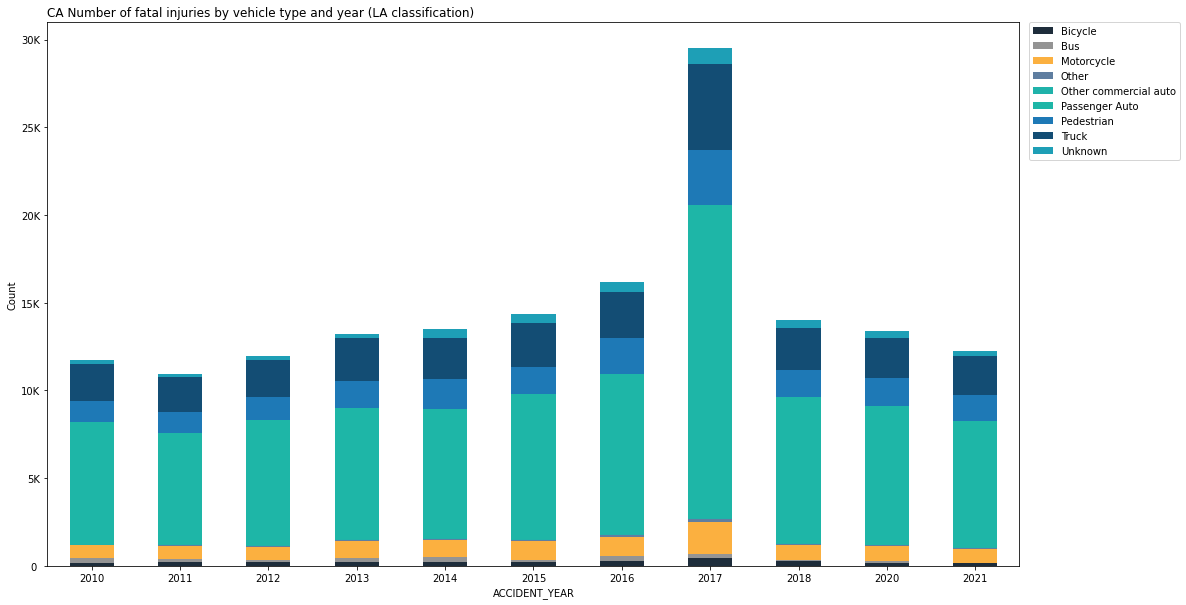

In [ ]:
%matplotlib inline


def format_func(value, tick_number = None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)
plt.title('CA Number of fatal injuries by vehicle type and year (LA classification)', loc = "left")
ax.ticklabel_format(style = 'plain')
fatal_stwd_1.plot.bar(stacked = True, color = ["#1E2D3B", "#949494", "#FBB040", "#5f7ea0", "#20b2aa", "#1eb6a7", "#1e79b6", "#134d74", "#1e9fb6"], ax = ax)
ax.legend(bbox_to_anchor = (1.17, 1.01))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.xticks(rotation = 360)
plt.ylabel('Count')

plt.show()
#plt.savefig('Statewide_year.png', dpi = 1000, bbox_inches = 'tight')

# HEX Dark Grey/Blue #1E2D3B RGB 30 45 59
# HEX Light grey #949494   RGB 148 148 148
# HEX Dark Yellow #FBB040  RGB 251 176 64

In [ ]:
Injury_severe_stwd = severity_vehicle_type.loc[severity_vehicle_type['COLLISION_SEVERITY'] == 'Injury (Severe)']
Injury_severe_stwd

CASE_ID COLLISION_SEVERITY  ACCIDENT_YEAR STWD_VEHICLE_TYPE
745       4392407    Injury (Severe)           2010    Passenger Auto
746       4392407    Injury (Severe)           2010    Passenger Auto
747       4392407    Injury (Severe)           2010             Truck
748       4392407    Injury (Severe)           2010             Truck
1460      4473970    Injury (Severe)           2010             Truck
...           ...                ...            ...               ...
10491243  9416855    Injury (Severe)           2021    Passenger Auto
10491244  9416870    Injury (Severe)           2021           Bicycle
10491245  9416870    Injury (Severe)           2021    Passenger Auto
10491292  9417940    Injury (Severe)           2021           Unknown
10491293  9417940    Injury (Severe)           2021           Unknown

[489031 rows x 4 columns]

In [ ]:
Injury_severe_stwd_1 = Injury_severe_stwd

In [ ]:
Injury_severe_stwd_1 = Injury_severe_stwd_1.groupby(['STWD_VEHICLE_TYPE', 'ACCIDENT_YEAR'])['CASE_ID'].count()
Injury_severe_stwd_1 = Injury_severe_stwd_1.to_frame(name= ("COLLISIONS"))
Injury_severe_stwd_1 = Injury_severe_stwd_1.reset_index()

In [ ]:
Injury_severe_stwd_1 = Injury_severe_stwd_1.explode('STWD_VEHICLE_TYPE').pivot_table(index = "ACCIDENT_YEAR",
                                                                     columns = 'STWD_VEHICLE_TYPE',
                                                                     values = 'COLLISIONS',
                                                                     aggfunc = 'sum')

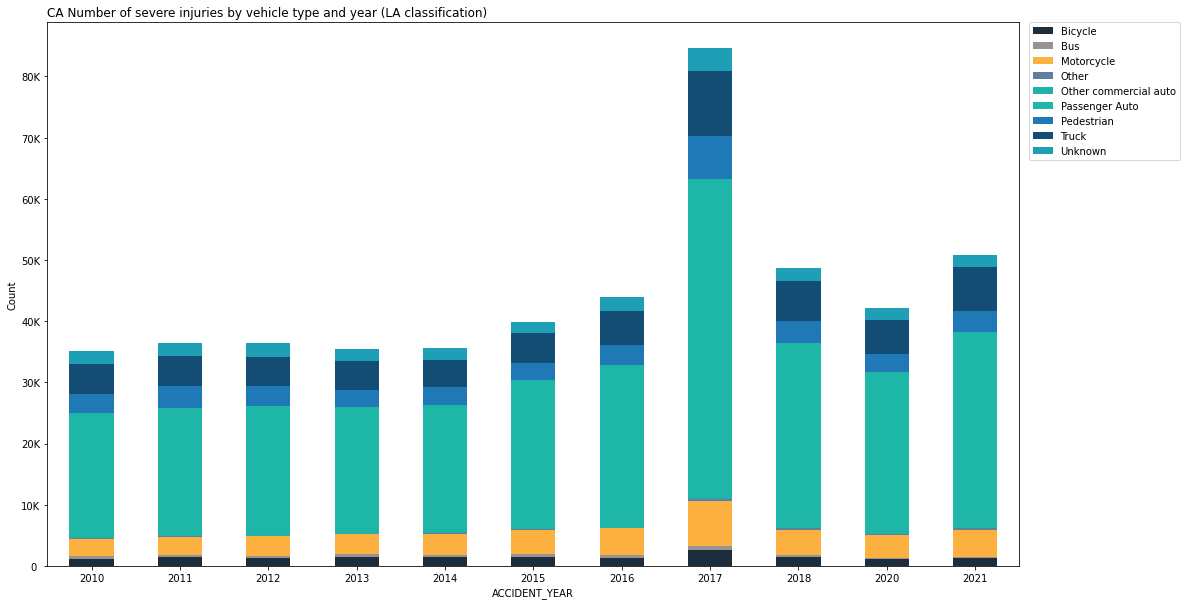

In [ ]:
%matplotlib inline


def format_func(value, tick_number = None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)
plt.title('CA Number of severe injuries by vehicle type and year (LA classification)', loc = "left")
ax.ticklabel_format(style = 'plain')
Injury_severe_stwd_1.plot.bar(stacked = True, color = ["#1E2D3B", "#949494", "#FBB040", "#5f7ea0", "#20b2aa", "#1eb6a7", "#1e79b6", "#134d74", "#1e9fb6"], ax = ax)
ax.legend(bbox_to_anchor = (1.17, 1.01))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.xticks(rotation = 360)
plt.ylabel('Count')

plt.show()
#plt.savefig('Statewide_year.png', dpi = 1000, bbox_inches = 'tight')

# HEX Dark Grey/Blue #1E2D3B RGB 30 45 59
# HEX Light grey #949494   RGB 148 148 148
# HEX Dark Yellow #FBB040  RGB 251 176 64

In [ ]:
Non_serious_stwd = severity_vehicle_type.loc[severity_vehicle_type['COLLISION_SEVERITY'] == 'PDO']
Non_serious_stwd

CASE_ID COLLISION_SEVERITY  ACCIDENT_YEAR STWD_VEHICLE_TYPE
1038      4392472                PDO           2010        Pedestrian
1039      4392472                PDO           2010        Pedestrian
1040      4392472                PDO           2010        Pedestrian
1041      4392472                PDO           2010        Pedestrian
1042      4392472                PDO           2010        Pedestrian
...           ...                ...            ...               ...
10491283  9417936                PDO           2021             Truck
10491284  9417936                PDO           2021    Passenger Auto
10491285  9417936                PDO           2021    Passenger Auto
10491286  9417936                PDO           2021    Passenger Auto
10491287  9417936                PDO           2021    Passenger Auto

[2357815 rows x 4 columns]

In [ ]:
Non_serious_stwd_1 = Non_serious_stwd

In [ ]:
Non_serious_stwd_1 = Non_serious_stwd_1.groupby(['STWD_VEHICLE_TYPE', 'ACCIDENT_YEAR'])['CASE_ID'].count()
Non_serious_stwd_1 = Non_serious_stwd_1.to_frame(name= ("COLLISIONS"))
Non_serious_stwd_1 = Non_serious_stwd_1.reset_index()

In [ ]:
Non_serious_stwd_1 = Non_serious_stwd_1.explode('STWD_VEHICLE_TYPE').pivot_table(index = "ACCIDENT_YEAR",
                                                                     columns = 'STWD_VEHICLE_TYPE',
                                                                     values = 'COLLISIONS',
                                                                     aggfunc = 'sum')

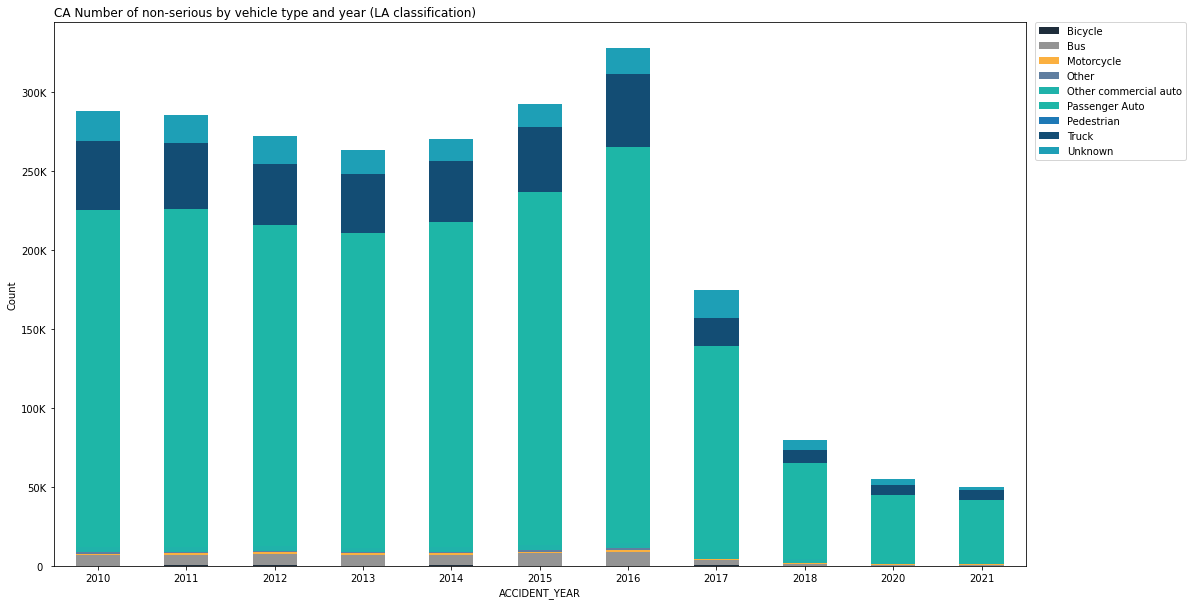

In [ ]:
%matplotlib inline


def format_func(value, tick_number = None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)
plt.title('CA Number of non-serious by vehicle type and year (LA classification)', loc = "left")
ax.ticklabel_format(style = 'plain')
Non_serious_stwd_1.plot.bar(stacked = True, color = ["#1E2D3B", "#949494", "#FBB040", "#5f7ea0", "#20b2aa", "#1eb6a7", "#1e79b6", "#134d74", "#1e9fb6"], ax = ax)
ax.legend(bbox_to_anchor = (1.17, 1.01))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.xticks(rotation = 360)
plt.ylabel('Count')

plt.show()
#plt.savefig('Statewide_year.png', dpi = 1000, bbox_inches = 'tight')

# HEX Dark Grey/Blue #1E2D3B RGB 30 45 59
# HEX Light grey #949494   RGB 148 148 148
# HEX Dark Yellow #FBB040  RGB 251 176 64

# ** **MAP POPULATION ACCIDENTS** **

In [ ]:
LOCATIONS_COUNTY = "LOCATIONS_COUNTY"

def CA_COUNTIES(LOCATIONS_COUNTY):
    # Generating new dataframe with CASE_ID AS COLLISIONS AND CNTY_CITY_LOC AS CODES OF COUNTIES
    LOCATIONS_COUNTY = collision_2010_2021[["CASE_ID", "CNTY_CITY_LOC"]]
    LOCATIONS_COUNTY = LOCATIONS_COUNTY.rename(columns = {"CNTY_CITY_LOC": "CTYNAME"})
    LOCATIONS_COUNTY.reset_index(drop = True, inplace = True)
    return LOCATIONS_COUNTY

CA_COUNTIES = CA_COUNTIES(LOCATIONS_COUNTY)

def CA_COUNTY_NAMES(county_CODE):
    # CHANING THE NAME OF THE CALIFORNIA COUNTIES CODES BASED ON SWIFTR CODING SEE PDF REPORT 22
    if county_CODE >= 1900 and county_CODE <= 1999: # LA COUNTY
        return "Los Angeles County"
    elif county_CODE >= 3700 and county_CODE <= 3797:  # San Diego County
        return "San Diego County"
    elif county_CODE >= 3000 and county_CODE <= 3097:  # Orange County
        return "Orange County"
    elif county_CODE >= 3300 and county_CODE <= 3397:  # Riverside County
        return "Riverside County"
    elif county_CODE >= 3600 and county_CODE <= 3690:  # San Bernardino County
        return "San Bernardino County"
    elif county_CODE >= 4300 and county_CODE <= 4320:  # Santa Clara County
        return "Santa Clara County"
    elif county_CODE >= 100 and county_CODE <= 198:    # Alameda County
        return "Alameda County"
    elif county_CODE >= 3400 and county_CODE <= 3497:  # Sacramento County
        return "Sacramento County"
    elif county_CODE >= 700 and county_CODE <= 792:    # Contra Costa County
        return "Contra Costa County"
    elif county_CODE >= 1000 and county_CODE <= 1097:  # Fresno County
        return "Fresno County"
    elif county_CODE >= 1500 and county_CODE <= 1515:  # Kern County
        return "Kern County"
    elif county_CODE >= 3800 and county_CODE <= 3897:  # San Francisco
        return "San Francisco County"
    elif county_CODE >= 5600 and county_CODE <= 5690:  # Ventura County
        return "Ventura County"
    elif county_CODE >= 3900 and county_CODE <= 3920:  # San Joaquin
        return "San Joaquin County"
    elif county_CODE >= 4100 and county_CODE <= 4127:  # San Mateo
        return "San Mateo County"
    elif county_CODE >= 5000 and county_CODE <= 5010:  # Stanislaus
        return "Stanislaus County"
    elif county_CODE >= 4900 and county_CODE <= 4980:  # Sonoma County
        return "Sonoma County"
    elif county_CODE >= 5400 and county_CODE <= 5408:  # Tulare County
        return "Tulare County"
    elif county_CODE >= 4800 and county_CODE <= 4807:  # Solano County
        return "Solano County"
    elif county_CODE >= 4200 and county_CODE <= 4297:  # Santa Barbara
        return "Santa Barbara County"
    elif county_CODE >= 2700 and county_CODE <= 2719:  # Monterey County
        return "Monterey County"
    elif county_CODE >= 3100 and county_CODE <= 3111:  # Placer County
        return "Placer County"
    elif county_CODE >= 2400 and county_CODE <= 2412:  # Merced County
        return "Merced County"
    elif county_CODE >= 4000 and county_CODE <= 4014:  # San Luis Obispo
        return "San Luis Obispo County"
    elif county_CODE >= 4400 and county_CODE <= 4497:  # Santa Cruz
        return "Santa Cruz County"
    elif county_CODE >= 2100 and county_CODE <= 2114:  # Marin County
        return "Marin County"
    elif county_CODE >= 5700 and county_CODE <= 5797:  # Yolo County
        return "Yolo County"
    elif county_CODE >= 900 and county_CODE <= 902:    # El Dorado County
        return "El Dorado County"
    elif county_CODE >= 400 and county_CODE <= 497:    # Butte County
        return "Butte County"
    elif county_CODE >= 4500 and county_CODE <= 4580:  # Shasta County
        return "Shasta County"
    elif county_CODE >= 1300 and county_CODE <= 1307:  # Imperial County
        return "Imperial County"
    elif county_CODE >= 2000 and county_CODE <= 2002:  # Madera County
        return "Madera County"
    elif county_CODE >= 1600 and county_CODE <= 1690:  # Kings County
        return "Kings County"
    elif county_CODE >= 2800 and county_CODE <= 2805:  # Napa County
        return "Napa County"
    elif county_CODE >= 1200 and county_CODE <= 1211:  # Humboldt County
        return "Humboldt County"
    elif county_CODE >= 2900 and county_CODE <= 2908:  # Nevada County
        return "Nevada County"
    elif county_CODE >= 5100 and county_CODE <= 5102:  # Sutter County
        return "Sutter County"
    elif county_CODE >= 2300 and county_CODE <= 2304:  # Mendocino County
        return "Mendocino County"
    elif county_CODE >= 5800 and county_CODE <= 5802:  # Yuba County
        return "Yuba County"
    elif county_CODE >= 5200 and county_CODE <= 5203:  # Tehama County
        return "Tehama County"
    elif county_CODE >= 3500 and county_CODE <= 3504:  # San Benito County
        return "San Benito County"
    elif county_CODE >= 1700 and county_CODE <= 1702:  # Lake County
        return "Lake County"
    elif county_CODE >= 5500 and county_CODE <= 5501:  # Tuolumne County
        return "Tuolumne County"
    elif county_CODE >= 500 and county_CODE <= 503:    # Calaveras County
        return "Calaveras County"
    elif county_CODE >= 4700 and county_CODE <= 4710:  # Siskiyou County
        return "Siskiyou County"
    elif county_CODE >= 300 and county_CODE <= 305:    # Amador County
        return "Amador County"
    elif county_CODE >= 1800 and county_CODE <= 1801:  # Lassen County
        return "Lassen County"
    elif county_CODE >= 1100 and county_CODE <= 1102:  # Glenn County
        return "Glenn County"
    elif county_CODE >= 800 and county_CODE <= 801:    # Del Norte
        return "Del Norte County"
    elif county_CODE >= 600 and county_CODE <= 602:    #  Colusa County
        return "Colusa County"
    elif county_CODE >= 3200 and county_CODE <= 3201:  #  Plumas County
        return "Plumas County"
    elif county_CODE >= 1400 and county_CODE <= 1401:  # Inyo County
        return "Inyo County"
    elif county_CODE >= 2200 and county_CODE <= 2200:  # Mariposa County
        return "Mariposa County"
    elif county_CODE >= 2600 and county_CODE <= 2601:  # Mono County
        return "Mono County"
    elif county_CODE >= 5300 and county_CODE <= 5300:  # Trinity County
        return "Trinity County"
    elif county_CODE >= 2500 and county_CODE <= 2501:  # Modoc County
        return "Modoc County"
    elif county_CODE >= 4600 and county_CODE <= 4601:  # Sierra County
        return "Sierra County"
    elif county_CODE >= 200 and county_CODE <= 200:    # Alpine County
        return "Alpine County"
    else:
        return county_CODE

CA_COUNTIES['CTYNAME'] = CA_COUNTIES.CTYNAME.apply(CA_COUNTY_NAMES)
CA_COUNTIES

NameError: ignored

In [ ]:
CA_COUNTIES.loc[CA_COUNTIES['CTYNAME'] == "Alpine County"]

CASE_ID        CTYNAME
10273     4570281  Alpine County
10285     4570293  Alpine County
11123     4571226  Alpine County
14272     4574698  Alpine County
20222     4580849  Alpine County
...           ...            ...
4989125  91669842  Alpine County
4989916  91671219  Alpine County
4989921  91671225  Alpine County
4990132  91671496  Alpine County
4992861  91682736  Alpine County

[868 rows x 2 columns]

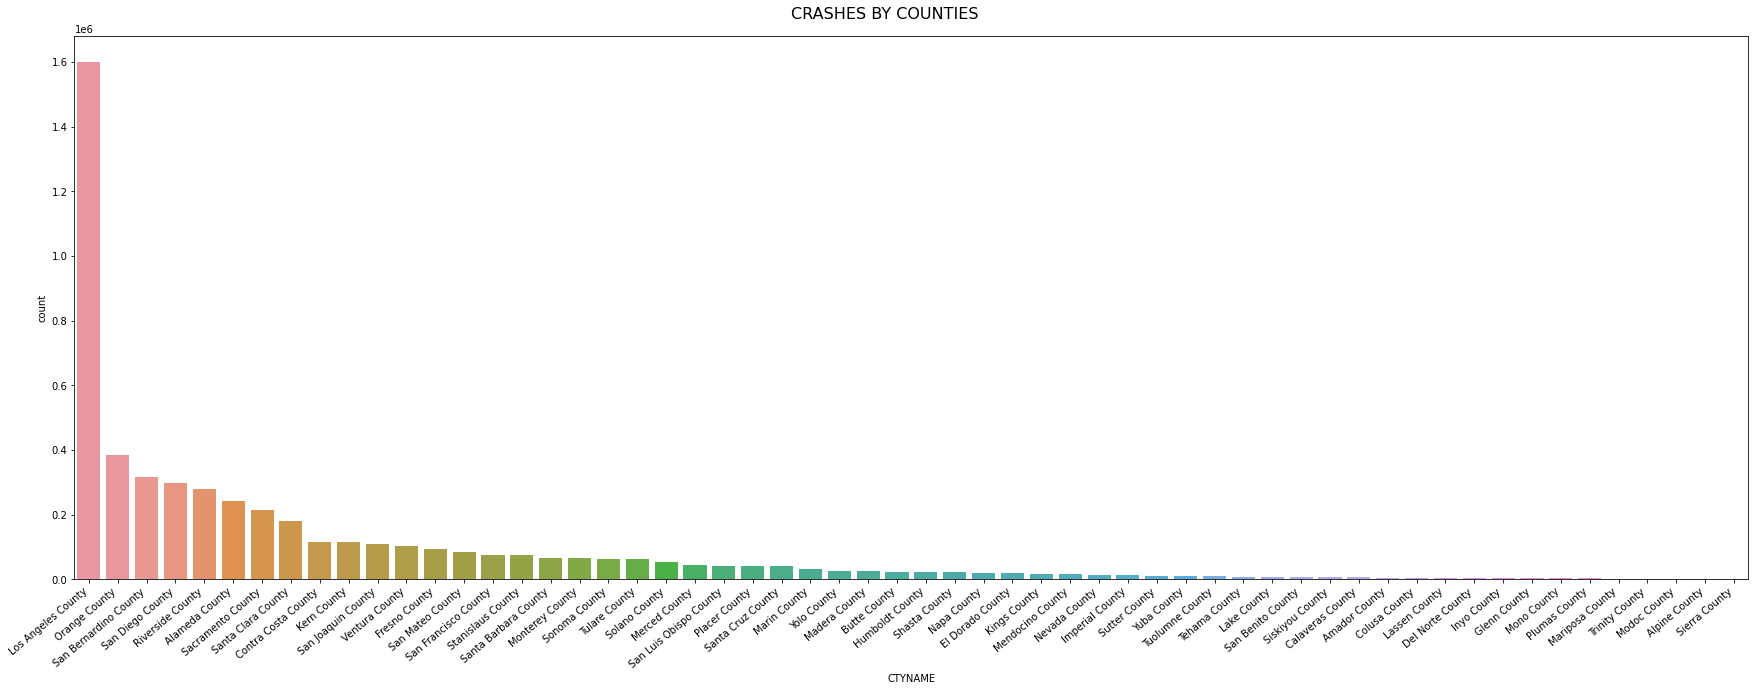

In [ ]:
dataframe_ = "dataframe_"
countplot_ = "countplot_"

def CrashByCounties_Plot(dataframe_, countplot_):
    # ploting number of crases by counties
    dataframe_ = CA_COUNTIES
    fig, ax = plt.subplots(1, figsize=(30, 10))
    fig.suptitle('CRASHES BY COUNTIES', fontsize=16, y=.92)
    countplot_ = sns.countplot(x = "CTYNAME", data = dataframe_, order = dataframe_['CTYNAME'].value_counts().index)
    countplot_.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    return dataframe_

CA_COUNTIES_Plot = CrashByCounties_Plot(dataframe_, countplot_)

def CrashByCounties(dataframe_):
    # crashes grouped by counties
    dataframe_ = CA_COUNTIES
    dataframe_ = dataframe_.groupby('CTYNAME')['CASE_ID'].count()
    dataframe_ = dataframe_.to_frame(name= ("COLLISIONS"))
    dataframe_ = dataframe_.reset_index(level = 0)
    return dataframe_

CA_COUNTIES_GROUPED = CrashByCounties(dataframe_)

In [ ]:
CA_COUNTIES_GROUPED

CTYNAME  COLLISIONS
0           Alameda County      242514
1            Alpine County         868
2            Amador County        5696
3             Butte County       24403
4         Calaveras County        6760
5            Colusa County        4051
6      Contra Costa County      117068
7         Del Norte County        3753
8         El Dorado County       19658
9            Fresno County       92706
10            Glenn County        3615
11         Humboldt County       23149
12         Imperial County       13785
13             Inyo County        3716
14             Kern County      115984
15            Kings County       18272
16             Lake County        8020
17           Lassen County        4049
18      Los Angeles County     1600780
19           Madera County       26054
20            Marin County       33242
21         Mariposa County        2685
22        Mendocino County       15438
23           Merced County       44380
24            Modoc County        1455
25             Mono County        3570
26         Monterey County       65626
27             Napa County       19684
28           Nevada County       13812
29           Orange County      383860
30           Placer County       40674
31           Plumas County        3133
32        Riverside County      280324
33       Sacramento County      213724
34       San Benito County        7925
35   San Bernardino County      316540
36        San Diego County      296700
37    San Francisco County       76292
38      San Joaquin County      110797
39  San Luis Obispo County       42660
40        San Mateo County       83950
41    Santa Barbara County       66958
42      Santa Clara County      179692
43       Santa Cruz County       40324
44           Shasta County       21498
45           Sierra County         782
46         Siskiyou County        6864
47           Solano County       55459
48           Sonoma County       63334
49       Stanislaus County       74809
50           Sutter County       12163
51           Tehama County        8932
52          Trinity County        2645
53           Tulare County       63234
54         Tuolumne County        9636
55          Ventura County      103716
56             Yolo County       27277
57             Yuba County        9753

In [ ]:
CA_POP = pd.read_csv("/content/CA_ccounties_pop.csv")
ca_population = CA_POP[["CTYNAME", "pop2022"]]
ca_population

CTYNAME  pop2022
0       Los Angeles County  9934710
1         San Diego County  3351740
2            Orange County  3174850
3         Riverside County  2544820
4    San Bernardino County  2220080
5       Santa Clara County  1914400
6           Alameda County  1685050
7        Sacramento County  1591990
8      Contra Costa County  1162550
9            Fresno County  1020550
10             Kern County   919534
11    San Francisco County   884108
12          Ventura County   839598
13      San Joaquin County   791119
14        San Mateo County   760249
15       Stanislaus County   558262
16           Sonoma County   481415
17           Tulare County   471013
18           Solano County   453397
19    Santa Barbara County   448656
20         Monterey County   434394
21           Placer County   416326
22           Merced County   288267
23  San Luis Obispo County   282382
24       Santa Cruz County   271329
25            Marin County   256318
26             Yolo County   221646
27        El Dorado County   199134
28            Butte County   185727
29           Shasta County   181193
30         Imperial County   180291
31           Madera County   158662
32            Kings County   157614
33             Napa County   134609
34         Humboldt County   133500
35           Nevada County   100496
36           Sutter County    98840
37        Mendocino County    84793
38             Yuba County    82001
39           Tehama County    68282
40       San Benito County    66831
41             Lake County    64593
42         Tuolumne County    54751
43        Calaveras County    46526
44         Siskiyou County    43506
45           Amador County    40793
46           Lassen County    30438
47            Glenn County    29671
48        Del Norte County    28028
49           Colusa County    21934
50           Plumas County    19005
51             Inyo County    18318
52         Mariposa County    16597
53             Mono County    14567
54          Trinity County    11439
55            Modoc County     8964
56           Sierra County     3029
57           Alpine County     1249

In [ ]:
CA_POP_2010_CENSUS

Population                 CTYNAME      STNAME
0      1477980          Alameda County  California
1         1176           Alpine County  California
2        38327           Amador County  California
3       218635            Butte County  California
4        45994        Calaveras County  California
5        21165           Colusa County  California
6      1024809     Contra Costa County  California
7        28471        Del Norte County  California
8       179053        El Dorado County  California
9       908830           Fresno County  California
10       27935            Glenn County  California
11      133058         Humboldt County  California
12      168052         Imperial County  California
13       18434             Inyo County  California
14      815693             Kern County  California
15      151122            Kings County  California
16       64371             Lake County  California
17       35081           Lassen County  California
18     9758256      Los Angeles County  California
19      147738           Madera County  California
20      248601            Marin County  California
21       18290         Mariposa County  California
22       87487        Mendocino County  California
23      250699           Merced County  California
24        9605            Modoc County  California
25       13905             Mono County  California
26      407435         Monterey County  California
27      134051             Napa County  California
28       98186           Nevada County  California
29     2965525           Orange County  California
30      336477           Placer County  California
31       20392           Plumas County  California
32     2109464        Riverside County  California
33     1395144       Sacramento County  California
34       54492       San Benito County  California
35     2005287   San Bernardino County  California
36     3022468        San Diego County  California
37      789172    San Francisco County  California
38      673613      San Joaquin County  California
39      265577  San Luis Obispo County  California
40      704327        San Mateo County  California
41      416051    Santa Barbara County  California
42     1739396      Santa Clara County  California
43      256901       Santa Cruz County  California
44      176906           Shasta County  California
45        3366           Sierra County  California
46       44690         Siskiyou County  California
47      410042           Solano County  California
48      474047           Sonoma County  California
49      509682       Stanislaus County  California
50       93420           Sutter County  California
51       62575           Tehama County  California
52       13701          Trinity County  California
53      429404           Tulare County  California
54       56074         Tuolumne County  California
55      809080          Ventura County  California
56      196418             Yolo County  California
57       71160             Yuba County  California

In [ ]:
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample

FIPS      STNAME          CTYNAME  TOT_POP  TOT_MALE  TOT_FEMALE  \
0     18049     Indiana    Fulton County    20737     10369       10368   
1     18051     Indiana    Gibson County    33458     16642       16816   
2     18053     Indiana     Grant County    69330     33282       36048   
3     18055     Indiana    Greene County    32940     16479       16461   
4     18057     Indiana  Hamilton County   289495    141103      148392   
...     ...         ...              ...      ...       ...         ...   
3138  18043     Indiana     Floyd County    75283     36510       38773   
3139  18045     Indiana  Fountain County    17119      8520        8599   
3140  18047     Indiana  Franklin County    22969     11475       11494   
3141  35011  New Mexico   De Baca County     1927       956         971   
3142  35013  New Mexico  Doña Ana County   214445    105533      108912   

      WA_MALE  WA_FEMALE  NHWA_MALE  NHWA_FEMALE  NHWhite_Alone  \
0        9985      10020       9561         9627          19188   
1       15873      16117      15648        15955          31603   
2       29587      32460      28353        31398          59751   
3       16179      16167      16029        15999          32028   
4      125675     131785     120979       127105         248084   
...       ...        ...        ...          ...            ...   
3138    33379      35523      32342        34694          67036   
3139     8364       8421       8180         8251          16431   
3140    11311      11318      11210        11221          22431   
3141      897        931        545          573           1118   
3142    97485     100963      31709        31354          63063   

      Not_NHWhite_Alone MinorityMinority MinorityPCT  Black BlackPCT  \
0                  1549               No       7.47%    170       1%   
1                  1855               No       5.54%    667       2%   
2                  9579               No      13.82%   4936       7%   
3                   912               No       2.77%     82       0%   
4                 41411               No      14.30%  11332       4%   
...                 ...              ...         ...    ...      ...   
3138               8247               No      10.95%   3892       5%   
3139                688               No       4.02%     66       0%   
3140                538               No       2.34%     64       0%   
3141                809               No      41.98%      6       0%   
3142             151382              Yes      70.59%   4557       2%   

      Hispanic HispanicPCT  
0          965       4.65%  
1          476       1.42%  
2         2656       3.83%  
3          351       1.07%  
4        10548       3.64%  
...        ...         ...  
3138      2162       2.87%  
3139       392       2.29%  
3140       225       0.98%  
3141       758      39.34%  
3142    142403      66.41%  

[3143 rows x 18 columns]

In [ ]:
# counties_ca['Collisions per Population'] = counties_ca['pop2022']  / counties_ca['COLLISIONS']

In [ ]:
join_ = "join_"

def merge_(join_):
  join_ = pd.merge(df_sample, ca_population, on = 'CTYNAME')
  return join_
counties_ca = merge_(join_)


In [ ]:
def merge_(join_):
  join_ = pd.merge(counties_ca, CA_COUNTIES_GROUPED, on = 'CTYNAME')
  return join_
counties_ca = merge_(join_)

counties_ca.drop(['TOT_POP', 'TOT_POP', "TOT_FEMALE", "TOT_MALE" ,"WA_MALE", "WA_FEMALE", "NHWA_MALE",
                                "NHWA_FEMALE", "NHWhite_Alone",	"Not_NHWhite_Alone",	"MinorityMinority",
                                "MinorityPCT",	"Black",	"BlackPCT",	"Hispanic", "HispanicPCT"], axis = 1, inplace = True)


FIPS      STNAME          CTYNAME  pop2022  COLLISIONS_x  COLLISIONS_y
0   18089     Indiana      Lake County    64593          8020          8020
1   26085    Michigan      Lake County    64593          8020          8020
2   27075   Minnesota      Lake County    64593          8020          8020
3   30047     Montana      Lake County    64593          8020          8020
4   39085        Ohio      Lake County    64593          8020          8020
..    ...         ...              ...      ...           ...           ...
80   6107  California    Tulare County   471013         63234         63234
81   6109  California  Tuolumne County    54751          9636          9636
82   6111  California   Ventura County   839598        103716        103716
83   6113  California      Yolo County   221646         27277         27277
84   6115  California      Yuba County    82001          9753          9753

[85 rows x 6 columns]

In [ ]:
join_ = "join_"

def merge_(join_):
  join_ = pd.merge(df_sample, ca_population, on = 'CTYNAME')
  return join_
counties_ca = merge_(join_)

def merge_(join_):
  join_ = pd.merge(counties_ca, CA_COUNTIES_GROUPED, on = 'CTYNAME')
  return join_
counties_ca = merge_(join_)

counties_ca.drop(['TOT_POP', 'TOT_POP', "TOT_FEMALE", "TOT_MALE" ,"WA_MALE", "WA_FEMALE", "NHWA_MALE",
                                "NHWA_FEMALE", "NHWhite_Alone",	"Not_NHWhite_Alone",	"MinorityMinority",
                                "MinorityPCT",	"Black",	"BlackPCT",	"Hispanic", "HispanicPCT"], axis = 1, inplace = True)



def CollisionsPerPopulation_Plot(dataframe_, barplot_):
    # ploting collisions per population
    dataframe_ = counties_ca[["COLLISIONS", "pop2022", "CTYNAME"]]
    dataframe_['Collisions per Population'] = dataframe_['COLLISIONS'] / dataframe_['pop2022'] * 100000
    fig, ax = plt.subplots(1, figsize=(30, 10))
    fig.suptitle('Collision per Population', fontsize = 16, y = .92)
    barplot_ = ax = sns.barplot(x = "CTYNAME", y = "Collisions per Population", order = dataframe_.sort_values('Collisions per Population', ascending = False).CTYNAME, data = dataframe_)
    barplot_.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
    return dataframe_

counties_ca_Plot = CollisionsPerPopulation_Plot(dataframe_, countplot_)


NameError: ignored

In [ ]:
def CollisionsPerPopulation(dataframe_):
  # generating a new columns Collisions per Population COLLISIONS divided by counties population
  global counties_ca
  dataframe_ = counties_ca
  dataframe_['Collisions per Population'] = dataframe_['COLLISIONS'] / dataframe_['pop2022'] * 100000
  dataframe_ = dataframe_.sort_values(by = ['Collisions per Population'], ascending = False)
  dataframe_ = dataframe_.reset_index(level = 0)
  del dataframe_["index"]
  dataframe_ = dataframe_.astype({'FIPS': 'str'})
  # dataframe_ = dataframe_.astype({'Collisions per Population': 'str'}) # if this row is applied changes the labels of the map
  dataframe_["FIPS"] = dataframe_["FIPS"].apply(lambda x: str(0)+str(x) if len(str(x))<5 else x)
  return dataframe_

counties_ca = CollisionsPerPopulation(dataframe_)
counties_ca.info()


def CollisionsPerPopulation(dataframe_):
  # generating a new columns Collisions per Population COLLISIONS divided by  counties population
  global counties_ca
  dataframe_ = counties_ca
  dataframe_['Collisions per Population'] = dataframe_['COLLISIONS'] / dataframe_['pop2022'] * 100000
  dataframe_ = dataframe_.sort_values(by = ['Collisions per Population'], ascending = False)
  dataframe_ = dataframe_.reset_index(level = 0)
  del dataframe_["index"]
  dataframe_ = dataframe_.astype({'FIPS': 'str'})
  dataframe_ = dataframe_.astype({'Collisions per Population': 'str'}) # if this row is applied changes the labels of the map
  dataframe_["FIPS"] = dataframe_["FIPS"].apply(lambda x: str(0)+str(x) if len(str(x))<5 else x)
  return dataframe_

counties_ca_1 = CollisionsPerPopulation(dataframe_)
counties_ca_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS                       85 non-null     object 
 1   STNAME                     85 non-null     object 
 2   CTYNAME                    85 non-null     object 
 3   pop2022                    85 non-null     int64  
 4   COLLISIONS                 85 non-null     int64  
 5   Collisions per Population  85 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   FIPS                       85 non-null     object
 1   STNAME                     85 non-null     object
 2   CTYNAME                    85 non-null     object
 3   pop202

In [ ]:
counties_ca_1["CTYNAME_COL_PER_POP"] = counties_ca_1["CTYNAME"] + counties_ca_1["Collisions per Population"]

In [ ]:
counties_ca_1["COUNTY_COL_PER_POP"] = counties_ca_1["CTYNAME"].map(str) + ': ' + counties_ca_1["Collisions per Population"].map(str)

In [ ]:
counties_ca_1

FIPS      STNAME               CTYNAME  pop2022  COLLISIONS  \
0   06003  California         Alpine County     1249         868   
1   35051  New Mexico         Sierra County     3029         782   
2   06091  California         Sierra County     3029         782   
3   06051  California           Mono County    14567        3570   
4   06105  California        Trinity County    11439        2645   
..    ...         ...                   ...      ...         ...   
80  06085  California    Santa Clara County  1914400      179692   
81  06019  California         Fresno County  1020550       92706   
82  06073  California      San Diego County  3351740      296700   
83  06075  California  San Francisco County   884108       76292   
84  06025  California       Imperial County   180291       13785   

   Collisions per Population                    CTYNAME_COL_PER_POP  \
0          69495.59647718174         Alpine County69495.59647718174   
1          25817.10135358204         Sierra County25817.10135358204   
2          25817.10135358204         Sierra County25817.10135358204   
3           24507.4483421432            Mono County24507.4483421432   
4         23122.650581344522       Trinity County23122.650581344522   
..                       ...                                    ...   
80         9386.335144170498    Santa Clara County9386.335144170498   
81         9083.925334378522         Fresno County9083.925334378522   
82          8852.11860108481       San Diego County8852.11860108481   
83         8629.262488293285  San Francisco County8629.262488293285   
84         7645.972344709387       Imperial County7645.972344709387   

                         COUNTY_COL_PER_POP  
0          Alpine County: 69495.59647718174  
1          Sierra County: 25817.10135358204  
2          Sierra County: 25817.10135358204  
3             Mono County: 24507.4483421432  
4        Trinity County: 23122.650581344522  
..                                      ...  
80    Santa Clara County: 9386.335144170498  
81         Fresno County: 9083.925334378522  
82       San Diego County: 8852.11860108481  
83  San Francisco County: 8629.262488293285  
84       Imperial County: 7645.972344709387  

[85 rows x 8 columns]

# **Choropleth Maps in Python**

In [ ]:
counties_ca.describe()

pop2022    COLLISIONS  Collisions per Population
count  8.500000e+01  8.500000e+01                  85.000000
mean   7.503643e+05  9.511326e+04               14572.186345
std    1.428928e+06  2.038870e+05                6974.436921
min    1.249000e+03  7.820000e+02                7645.972345
25%    6.459300e+04  8.020000e+03               12090.649952
50%    1.576140e+05  2.149800e+04               13081.046249
75%    7.602490e+05  7.629200e+04               15107.195218
max    9.934710e+06  1.600780e+06               69495.596477

In [ ]:
import plotly.express as px
import requests
import json


counties_ = "counties_"

def json_county_prep(counties_):
  r = requests.get('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
  counties_ = json.loads(r.text)
  target_states = ['06']
  counties_['features'] = [f for f in counties_['features'] if f['properties']['STATE'] in target_states]
  return counties_

counties = json_county_prep(counties_)

fig = px.choropleth(counties_ca,
                    geojson = counties,
                    locations = 'FIPS',
                    color = 'Collisions per Population',
                    color_continuous_scale = 'Viridis',
                    range_color=(0, 69495),
                    scope = 'usa',
                    hover_name = "CTYNAME",
                    labels = {'Collisions per Population': 'col per capita'}
                    )
fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
#fig.update_geos(fitbounds = "locations", visible = True) # set True to see neighbour states
fig.show()

In [ ]:
import plotly.express as px
import requests
import json


counties_ = "counties_"

def json_county_prep(counties_):
  r = requests.get('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
  counties_ = json.loads(r.text)
  target_states = ['06'] # refering to CA
  counties_['features'] = [f for f in counties_['features'] if f['properties']['STATE'] in target_states]
  return counties_

counties = json_county_prep(counties_)

fig = px.choropleth(counties_ca_1,
                    geojson = counties,
                    locations = 'FIPS',
                    color = 'COUNTY_COL_PER_POP',
                    color_continuous_scale = 'Viridis',
                    range_color=(0, 12),
                    scope = 'usa',
                    hover_name = "CTYNAME",
                    labels = {'COUNTY_COL_PER_POP': 'Collision per Population'}
                    )
fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.update_geos(fitbounds = "locations", visible = True) # set True to see neighbour states
fig.show()

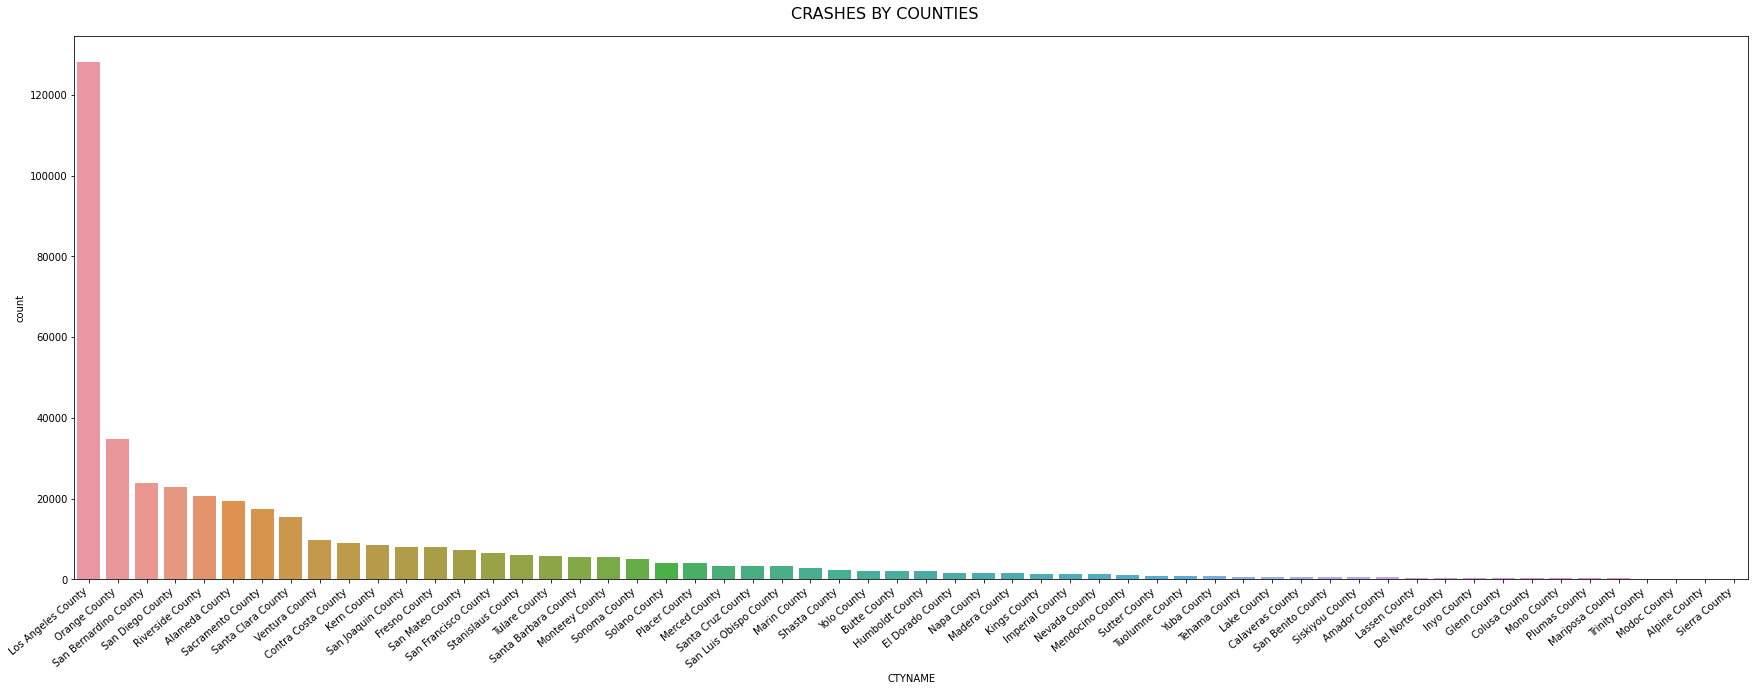

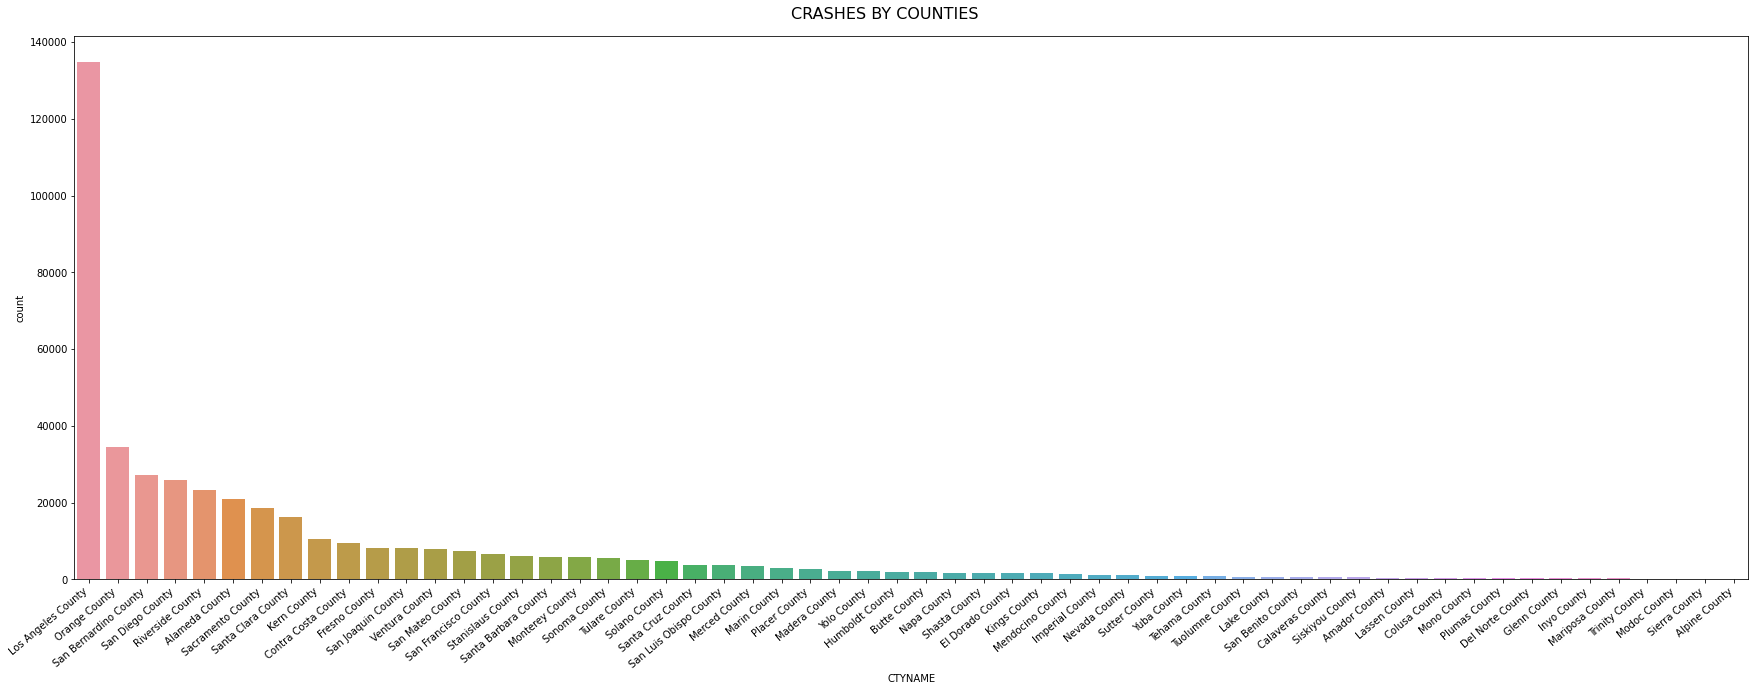

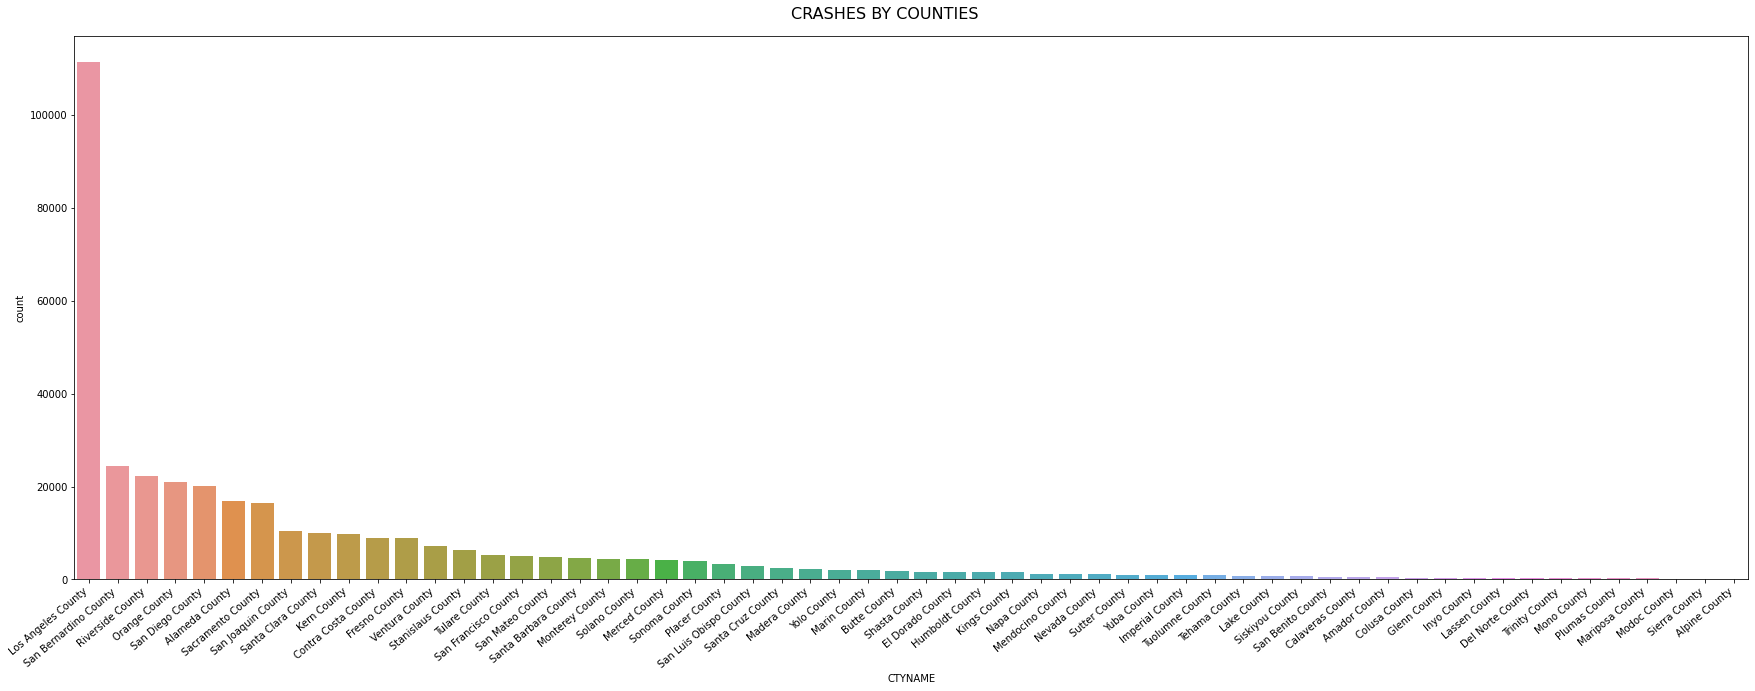

In [ ]:
LOCATIONS_COUNTY = "LOCATIONS_COUNTY"


def CA_COUNTIES(file):
    # Generating new dataframe with CASE_ID AS COLLISIONS AND CNTY_CITY_LOC AS CODES OF COUNTIES
    LOCATIONS_COUNTY = file[["CASE_ID", "CNTY_CITY_LOC"]]
    LOCATIONS_COUNTY = LOCATIONS_COUNTY.rename(columns = {"CNTY_CITY_LOC": "CTYNAME"})
    LOCATIONS_COUNTY.reset_index(drop = True, inplace = True)
    return LOCATIONS_COUNTY

CA_COUNTIES_2010 = CA_COUNTIES(collision_2010)
CA_COUNTIES_2015 = CA_COUNTIES(collision_2015)
CA_COUNTIES_2020 = CA_COUNTIES(collision_2020)



def CA_COUNTY_NAMES(county_CODE):
    # CHANING THE NAME OF THE CALIFORNIA COUNTIES CODES BASED ON SWIFTR CODING SEE PDF REPORT 22
    if county_CODE >= 1900 and county_CODE <= 1999: # LA COUNTY
        return "Los Angeles County"
    elif county_CODE >= 3700 and county_CODE <= 3797:  # San Diego County
        return "San Diego County"
    elif county_CODE >= 3000 and county_CODE <= 3097:  # Orange County
        return "Orange County"
    elif county_CODE >= 3300 and county_CODE <= 3397:  # Riverside County
        return "Riverside County"
    elif county_CODE >= 3600 and county_CODE <= 3690:  # San Bernardino County
        return "San Bernardino County"
    elif county_CODE >= 4300 and county_CODE <= 4320:  # Santa Clara County
        return "Santa Clara County"
    elif county_CODE >= 100 and county_CODE <= 198:    # Alameda County
        return "Alameda County"
    elif county_CODE >= 3400 and county_CODE <= 3497:  # Sacramento County
        return "Sacramento County"
    elif county_CODE >= 700 and county_CODE <= 792:    # Contra Costa County
        return "Contra Costa County"
    elif county_CODE >= 1000 and county_CODE <= 1097:  # Fresno County
        return "Fresno County"
    elif county_CODE >= 1500 and county_CODE <= 1515:  # Kern County
        return "Kern County"
    elif county_CODE >= 3800 and county_CODE <= 3897:  # San Francisco
        return "San Francisco County"
    elif county_CODE >= 5600 and county_CODE <= 5690:  # Ventura County
        return "Ventura County"
    elif county_CODE >= 3900 and county_CODE <= 3920:  # San Joaquin
        return "San Joaquin County"
    elif county_CODE >= 4100 and county_CODE <= 4127:  # San Mateo
        return "San Mateo County"
    elif county_CODE >= 5000 and county_CODE <= 5010:  # Stanislaus
        return "Stanislaus County"
    elif county_CODE >= 4900 and county_CODE <= 4980:  # Sonoma County
        return "Sonoma County"
    elif county_CODE >= 5400 and county_CODE <= 5408:  # Tulare County
        return "Tulare County"
    elif county_CODE >= 4800 and county_CODE <= 4807:  # Solano County
        return "Solano County"
    elif county_CODE >= 4200 and county_CODE <= 4297:  # Santa Barbara
        return "Santa Barbara County"
    elif county_CODE >= 2700 and county_CODE <= 2719:  # Monterey County
        return "Monterey County"
    elif county_CODE >= 3100 and county_CODE <= 3111:  # Placer County
        return "Placer County"
    elif county_CODE >= 2400 and county_CODE <= 2412:  # Merced County
        return "Merced County"
    elif county_CODE >= 4000 and county_CODE <= 4014:  # San Luis Obispo
        return "San Luis Obispo County"
    elif county_CODE >= 4400 and county_CODE <= 4497:  # Santa Cruz
        return "Santa Cruz County"
    elif county_CODE >= 2100 and county_CODE <= 2114:  # Marin County
        return "Marin County"
    elif county_CODE >= 5700 and county_CODE <= 5797:  # Yolo County
        return "Yolo County"
    elif county_CODE >= 900 and county_CODE <= 902:    # El Dorado County
        return "El Dorado County"
    elif county_CODE >= 400 and county_CODE <= 497:    # Butte County
        return "Butte County"
    elif county_CODE >= 4500 and county_CODE <= 4580:  # Shasta County
        return "Shasta County"
    elif county_CODE >= 1300 and county_CODE <= 1307:  # Imperial County
        return "Imperial County"
    elif county_CODE >= 2000 and county_CODE <= 2002:  # Madera County
        return "Madera County"
    elif county_CODE >= 1600 and county_CODE <= 1690:  # Kings County
        return "Kings County"
    elif county_CODE >= 2800 and county_CODE <= 2805:  # Napa County
        return "Napa County"
    elif county_CODE >= 1200 and county_CODE <= 1211:  # Humboldt County
        return "Humboldt County"
    elif county_CODE >= 2900 and county_CODE <= 2908:  # Nevada County
        return "Nevada County"
    elif county_CODE >= 5100 and county_CODE <= 5102:  # Sutter County
        return "Sutter County"
    elif county_CODE >= 2300 and county_CODE <= 2304:  # Mendocino County
        return "Mendocino County"
    elif county_CODE >= 5800 and county_CODE <= 5802:  # Yuba County
        return "Yuba County"
    elif county_CODE >= 5200 and county_CODE <= 5203:  # Tehama County
        return "Tehama County"
    elif county_CODE >= 3500 and county_CODE <= 3504:  # San Benito County
        return "San Benito County"
    elif county_CODE >= 1700 and county_CODE <= 1702:  # Lake County
        return "Lake County"
    elif county_CODE >= 5500 and county_CODE <= 5501:  # Tuolumne County
        return "Tuolumne County"
    elif county_CODE >= 500 and county_CODE <= 503:    # Calaveras County
        return "Calaveras County"
    elif county_CODE >= 4700 and county_CODE <= 4710:  # Siskiyou County
        return "Siskiyou County"
    elif county_CODE >= 300 and county_CODE <= 305:    # Amador County
        return "Amador County"
    elif county_CODE >= 1800 and county_CODE <= 1801:  # Lassen County
        return "Lassen County"
    elif county_CODE >= 1100 and county_CODE <= 1102:  # Glenn County
        return "Glenn County"
    elif county_CODE >= 800 and county_CODE <= 801:    # Del Norte
        return "Del Norte County"
    elif county_CODE >= 600 and county_CODE <= 602:    #  Colusa County
        return "Colusa County"
    elif county_CODE >= 3200 and county_CODE <= 3201:  #  Plumas County
        return "Plumas County"
    elif county_CODE >= 1400 and county_CODE <= 1401:  # Inyo County
        return "Inyo County"
    elif county_CODE >= 2200 and county_CODE <= 2200:  # Mariposa County
        return "Mariposa County"
    elif county_CODE >= 2600 and county_CODE <= 2601:  # Mono County
        return "Mono County"
    elif county_CODE >= 5300 and county_CODE <= 5300:  # Trinity County
        return "Trinity County"
    elif county_CODE >= 2500 and county_CODE <= 2501:  # Modoc County
        return "Modoc County"
    elif county_CODE >= 4600 and county_CODE <= 4601:  # Sierra County
        return "Sierra County"
    elif county_CODE >= 200 and county_CODE <= 200:    # Alpine County
        return "Alpine County"
    else:
        return county_CODE

CA_COUNTIES_2010['CTYNAME'] = CA_COUNTIES_2010.CTYNAME.apply(CA_COUNTY_NAMES)
CA_COUNTIES_2015['CTYNAME'] = CA_COUNTIES_2015.CTYNAME.apply(CA_COUNTY_NAMES)
CA_COUNTIES_2020['CTYNAME'] = CA_COUNTIES_2020.CTYNAME.apply(CA_COUNTY_NAMES)

dataframe_ = "dataframe_"
countplot_ = "countplot_"

def CrashByCounties_Plot(file, countplot_):
    # ploting number of crases by counties
    dataframe_ = file
    fig, ax = plt.subplots(1, figsize=(30, 10))
    fig.suptitle('CRASHES BY COUNTIES', fontsize=16, y=.92)
    countplot_ = sns.countplot(x = "CTYNAME", data = dataframe_, order = dataframe_['CTYNAME'].value_counts().index)
    countplot_.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    return dataframe_

CA_COUNTIES_Plot_2010 = CrashByCounties_Plot(CA_COUNTIES_2010, countplot_)
CA_COUNTIES_Plot_2015 = CrashByCounties_Plot(CA_COUNTIES_2015, countplot_)
CA_COUNTIES_Plot_2020 = CrashByCounties_Plot(CA_COUNTIES_2020, countplot_)

def CrashByCounties(file):
    # crashes grouped by counties
    dataframe_ = file
    dataframe_ = dataframe_.groupby('CTYNAME')['CASE_ID'].count()
    dataframe_ = dataframe_.to_frame(name= ("COLLISIONS"))
    dataframe_ = dataframe_.reset_index(level = 0)
    return dataframe_

CA_COUNTIES_GROUPED_2010 = CrashByCounties(CA_COUNTIES_2010)
CA_COUNTIES_GROUPED_2015 = CrashByCounties(CA_COUNTIES_2015)
CA_COUNTIES_GROUPED_2020 = CrashByCounties(CA_COUNTIES_2020)

In [ ]:
join_ = "join_"
filename = "filename"
dataframe_ = "dataframe_"
countplot_ = "countplot_"


def CA_CENSUS_PREP(filename):
    # preparing the census data
    census_df = pd.read_csv(filename)
    census_df = census_df[["Estimate!!Total", "Geographic Area Name"]]
    census_df["Geographic Area Name"] = census_df["Geographic Area Name"].map(lambda x: x.rstrip(', California'))
    census_df = census_df.rename(columns={"Geographic Area Name": "CTYNAME", "Estimate!!Total": "Population"})
    # census_df["STNAME"] = "California"
    return census_df

CA_POP_2010_CENSUS = CA_CENSUS_PREP("/content/drive/MyDrive/Anil 2022/CA_POP_CENSUS/CA_POP_2010_CENSUS.csv")
CA_POP_2015_CENSUS = CA_CENSUS_PREP("/content/drive/MyDrive/Anil 2022/CA_POP_CENSUS/CA_POP_2015_CENSUS.csv")
CA_POP_2020_CENSUS = CA_CENSUS_PREP("/content/drive/MyDrive/Anil 2022/CA_POP_CENSUS/CA_POP_2020_CENSUS.csv")

# CA_FIPS HAS FIPS CODES OF US COUNTIES FOR THE VISUALIZATION OF THE CA COUNTIES
def CA_FIPS(filename):
  dataframe_ = pd.read_csv(filename)
  dataframe_  = dataframe_.loc[dataframe_['STNAME'] == 'California']
  dataframe_.reset_index(drop = True, inplace = True)
  return dataframe_
CA_FIPS = CA_FIPS('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')


def merge_(filename_1, filename_2):
  # JOINGIN CA_FIPS AND CA_POP_2010_CENSUS ON CTYNAME
  join_ = pd.merge(filename_1, filename_2, on = 'CTYNAME')
  return join_
CA_CTY_COL_2010 = merge_(CA_FIPS, CA_POP_2010_CENSUS)
CA_CTY_COL_2015 = merge_(CA_FIPS, CA_POP_2015_CENSUS)
CA_CTY_COL_2020 = merge_(CA_FIPS, CA_POP_2020_CENSUS)


def merge_(filename_1, filename_2):
  # mering CA_POP_2010_CENSUS and CA_COUNTIES_GROUPED (contining collisions)
  join_ = pd.merge(filename_1, filename_2, on = 'CTYNAME')
  dataframe_ = join_[["FIPS", "STNAME",	"CTYNAME", "Population","COLLISIONS"]]
  return dataframe_

CA_CTY_COL_2010 = merge_(CA_CTY_COL_2010, CA_COUNTIES_GROUPED_2010)
CA_CTY_COL_2015 = merge_(CA_CTY_COL_2015, CA_COUNTIES_GROUPED_2015)
CA_CTY_COL_2020 = merge_(CA_CTY_COL_2020, CA_COUNTIES_GROUPED_2020)

def CollisionsPerPopulation(filename):
  # generating a new columns Collisions per Population COLLISIONS divided by counties population
  #global counties_ca
  dataframe_ = filename
  dataframe_['Collisions per Population'] = dataframe_['COLLISIONS'] / dataframe_['Population'] * 100000
  dataframe_ = dataframe_.sort_values(by = ['Collisions per Population'], ascending = False)
  dataframe_ = dataframe_.reset_index(level = 0)
  del dataframe_["index"]
  dataframe_ = dataframe_.astype({'FIPS': 'str'})
  # dataframe_ = dataframe_.astype({'Collisions per Population': 'str'}) # if this row is applied changes the labels of the map
  dataframe_["FIPS"] = dataframe_["FIPS"].apply(lambda x: str(0)+str(x) if len(str(x))<5 else x)
  dataframe_ = dataframe_.rename(columns = {"FIPS": "GEOID"})
  return dataframe_

CA_CTY_COL_2010 = CollisionsPerPopulation(CA_CTY_COL_2010)
CA_CTY_COL_2015 = CollisionsPerPopulation(CA_CTY_COL_2015)
CA_CTY_COL_2020 = CollisionsPerPopulation(CA_CTY_COL_2020)

In [ ]:
CA_CTY_COL_2015

GEOID      STNAME                 CTYNAME  Population  COLLISIONS  \
0   06003  California           Alpine County        1131          70   
1   06091  California           Sierra County        3021          72   
2   06051  California             Mono County       14146         309   
3   06105  California          Trinity County       13373         224   
4   06011  California           Colusa County       21396         321   
5   06045  California        Mendocino County       87544        1311   
6   06023  California         Humboldt County      135034        2005   
7   06063  California           Plumas County       18966         281   
8   06039  California           Madera County      153187        2239   
9   06027  California             Inyo County       18373         263   
10  06043  California         Mariposa County       17789         254   
11  06087  California       Santa Cruz County      269278        3787   
12  06109  California         Tuolumne County       54079         758   
13  06047  California           Merced County      263885        3602   
14  06079  California  San Luis Obispo County      276517        3747   
15  06083  California    Santa Barbara County      435850        5904   
16  06053  California         Monterey County      428441        5764   
17  06037  California      Los Angeles County    10038388      134896   
18  06049  California            Modoc County        9184         123   
19  06001  California          Alameda County     1584983       20945   
20  06071  California   San Bernardino County     2094769       27281   
21  06009  California        Calaveras County       44767         570   
22  06067  California       Sacramento County     1465832       18571   
23  06055  California             Napa County      140295        1750   
24  06103  California           Tehama County       63152         780   
25  06029  California             Kern County      865736       10604   
26  06093  California         Siskiyou County       43895         510   
27  06099  California       Stanislaus County      527367        6113   
28  06077  California      San Joaquin County      708554        8206   
29  06097  California           Sonoma County      495078        5663   
30  06041  California            Marin County      258349        2909   
31  06057  California           Nevada County       98570        1101   
32  06059  California           Orange County     3116069       34454   
33  06107  California           Tulare County      454033        5016   
34  06095  California           Solano County      425753        4703   
35  06115  California             Yuba County       73437         806   
36  06031  California            Kings County      150998        1655   
37  06005  California           Amador County       36995         399   
38  06069  California       San Benito County       57557         619   
39  06101  California           Sutter County       95247        1008   
40  06033  California             Lake County       64158         676   
41  06113  California             Yolo County      207320        2133   
42  06065  California        Riverside County     2298032       23392   
43  06015  California        Del Norte County       27788         280   
44  06035  California           Lassen County       32645         327   
45  06021  California            Glenn County       28029         277   
46  06081  California        San Mateo County      748731        7310   
47  06111  California          Ventura County      840833        8000   
48  06089  California           Shasta County      178942        1686   
49  06017  California        El Dorado County      182093        1660   
50  06085  California      Santa Clara County     1868149       16296   
51  06013  California     Contra Costa County     1096068        9541   
52  06019  California           Fresno County      956749        8316   
53  06007  California            Butte County      222564     

In [ ]:
CA_CTY_COL_2010.describe()

Population     COLLISIONS  Collisions per Population
count  5.800000e+01      58.000000                  58.000000
mean   6.316774e+05    7180.862069                1304.486787
std    1.403448e+06   17691.988065                 833.530661
min    1.176000e+03      76.000000                 759.611020
25%    4.811850e+04     544.750000                1034.372631
50%    1.779795e+05    1993.000000                1192.965056
75%    6.326302e+05    6404.000000                1340.332631
max    9.758256e+06  128199.000000                7227.891156

In [ ]:
# collision 2010
import plotly.express as px
import requests
import json


counties_ = "counties_"

def json_county_prep(counties_):
  r = requests.get('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
  counties_ = json.loads(r.text)
  target_states = ['06']
  counties_['features'] = [f for f in counties_['features'] if f['properties']['STATE'] in target_states]
  return counties_

counties = json_county_prep(counties_)

fig = px.choropleth(CA_CTY_COL_2010,
                    geojson = counties,
                    locations = 'FIPS',
                    color = 'Collisions per Population',
                    color_continuous_scale = 'Viridis',
                    range_color=(750, 7228),
                    scope = 'usa',
                    hover_name = "CTYNAME",
                    labels = {'Collisions per Population': 'col per capita'}
                    )
fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.update_geos(fitbounds = "locations", visible = True) # set True to see neighbour states
fig.show()

ValueError: ignored

In [ ]:
df = px.data.election()
geojson = px.data.election_geojson()
gdf = (
    gpd.GeoDataFrame.from_features(geojson)
    .merge(df, on="district")
    .assign(lat=lambda d: d.geometry.centroid.y, lon=lambda d: d.geometry.centroid.x)
    .set_index("district", drop=False)
)
geojson

{'features': [{'geometry': {'coordinates': [[[[-73.6363215300962,
        45.5759177646435],
       [-73.6362833815582, 45.5758266113331],
       [-73.6446417578686, 45.5658132919643],
       [-73.6453511352974, 45.5647725775888],
       [-73.648867564748, 45.5586898267402],
       [-73.6513170845065, 45.5545659435652],
       [-73.6515658357324, 45.5554439857955],
       [-73.6660837831645, 45.5596724837829],
       [-73.6706609041685, 45.5610978251999],
       [-73.6676019919116, 45.5632340862888],
       [-73.6645385824068, 45.5642716484367],
       [-73.663663123697, 45.5654269638586],
       [-73.663336397858, 45.5666288247853],
       [-73.6637764768649, 45.5678900619231],
       [-73.6625073244826, 45.5688479494114],
       [-73.6624620526633, 45.5708304456346],
       [-73.6620201425015, 45.5713925326191],
       [-73.6616100197742, 45.5737924780218],
       [-73.6612199500215, 45.5747171555678],
       [-73.6625087613399, 45.5748980132699],
       [-73.6639172423219, 45.573004

In [ ]:
counties
# see https://stackoverflow.com/questions/67989327/how-to-add-static-labels-to-plotly-express-choropleth-mapbox
# I might have to merge NAME in counties is the district name and generate a column in CA_CTY_COL_2010 with a name such as disctrict name it might work

{'features': [{'geometry': {'coordinates': [[[-120.995497, 38.225405],
      [-121.027084, 38.300252],
      [-121.027507, 38.508292],
      [-120.813554, 38.562193],
      [-120.627604, 38.503143],
      [-120.510596, 38.511467],
      [-120.301721, 38.549109],
      [-120.098322, 38.709029],
      [-120.072392, 38.702767],
      [-120.072484, 38.509869],
      [-120.380707, 38.461042],
      [-120.423215, 38.473322],
      [-120.893792, 38.221277],
      [-120.995497, 38.225405]]],
    'type': 'Polygon'},
   'id': '06005',
   'properties': {'CENSUSAREA': 594.583,
    'COUNTY': '005',
    'GEO_ID': '0500000US06005',
    'LSAD': 'County',
    'NAME': 'Amador',
    'STATE': '06'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-122.937654, 39.798156],
      [-122.046471, 39.797648],
      [-121.950951, 39.715004],
      [-121.994021, 39.533926],
      [-121.856532, 39.536904],
      [-121.890013, 39.383864],
      [-122.136161, 39.414499],
      [-122.136006, 39.385494],
     

In [ ]:
CA_CTY_COL_2015.describe()

Population     COLLISIONS  Collisions per Population
count  5.800000e+01      58.000000                  58.000000
mean   6.624390e+05    7550.706897                1283.810901
std    1.454645e+06   18671.938284                 721.550559
min    1.131000e+03      70.000000                 679.550632
25%    4.709500e+04     582.250000                1010.200509
50%    1.805175e+05    1956.000000                1150.996742
75%    6.632572e+05    6512.000000                1354.951413
max    1.003839e+07  134896.000000                6189.213086

In [ ]:
# collision 2015
import plotly.express as px
import requests
import json


counties_ = "counties_"

def json_county_prep(counties_):
  r = requests.get('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
  counties_ = json.loads(r.text)
  target_states = ['06']
  counties_['features'] = [f for f in counties_['features'] if f['properties']['STATE'] in target_states]
  return counties_

counties = json_county_prep(counties_)

fig = px.choropleth(CA_CTY_COL_2015,
                    geojson = counties,
                    locations = 'FIPS',
                    color = 'Collisions per Population',
                    color_continuous_scale = 'Viridis',
                    range_color=(720, 6190),
                    scope = 'usa',
                    hover_name = "CTYNAME",
                    labels = {'Collisions per Population': 'col per capita'}
                    )
fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
#fig.update_geos(fitbounds = "locations", visible = True) # set True to see neighbour states
fig.show()

In [ ]:
CA_CTY_COL_2020.describe()

Population     COLLISIONS  Collisions per Population
count  5.800000e+01      58.000000                  58.000000
mean   6.783797e+05    6333.155172                1176.301463
std    1.466188e+06   15309.536563                 648.696172
min    1.159000e+03      61.000000                 514.191851
25%    4.790775e+04     631.500000                 902.825493
50%    1.854625e+05    1722.500000                1070.543526
75%    7.002700e+05    5110.000000                1241.428761
max    1.004068e+07  111427.000000                5263.157895

In [ ]:
# collision 2020
import plotly.express as px
import requests
import json


counties_ = "counties_"

def json_county_prep(counties_):
  r = requests.get('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
  counties_ = json.loads(r.text)
  target_states = ['06']
  counties_['features'] = [f for f in counties_['features'] if f['properties']['STATE'] in target_states]
  return counties_

counties = json_county_prep(counties_)

fig = px.choropleth(CA_CTY_COL_2020,
                    geojson = counties,
                    locations = 'FIPS',
                    color = 'Collisions per Population',
                    color_continuous_scale = 'Viridis',
                    range_color=(515, 5264),
                    scope = 'usa',
                    hover_name = "CTYNAME",
                    labels = {'Collisions per Population': 'col per capita'}
                    )
fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
#fig.update_geos(fitbounds = "locations", visible = True) # set True to see neighbour states
fig.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')


import seaborn as sns
#sns.set_style('darkgrid')
#sns.set_style('whitegrid')
#sns.set_style('white')

import geopandas as gpd

import plotly.express as px
import pyproj

***MATPLOTLIP MAP***

In [ ]:
# 1 MERGING GEO PANDAS AND CA COUNTIES

def geo_prep_merge_2010(dataframe_geo, filename):
  global CA_CTY_COL_2010
  filename = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_us_county_20m.zip")
  filename = filename[["GEOID", "geometry", "NAME"]]
  dataframe_geo = filename.merge(dataframe_geo, on = 'GEOID')
  dataframe_geo = gpd.GeoDataFrame(dataframe_geo)
  return dataframe_geo

CA_CTY_COL_2010_geo = geo_prep_merge_2010(CA_CTY_COL_2010, filename)

def geo_prep_merge_2015(dataframe_geo, filename):
  global CA_CTY_COL_2015
  filename = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_us_county_20m.zip")
  filename = filename[["GEOID", "geometry", "NAME"]]
  dataframe_geo = filename.merge(dataframe_geo, on = 'GEOID')
  dataframe_geo = gpd.GeoDataFrame(dataframe_geo)
  return dataframe_geo

CA_CTY_COL_2015_geo = geo_prep_merge_2015(CA_CTY_COL_2015, filename)

def geo_prep_merge_2020(dataframe_geo, filename):
  global CA_CTY_COL_2020
  filename = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_us_county_20m.zip")
  filename = filename[["GEOID", "geometry", "NAME"]]
  dataframe_geo = filename.merge(dataframe_geo, on = 'GEOID')
  dataframe_geo = gpd.GeoDataFrame(dataframe_geo)
  return dataframe_geo

CA_CTY_COL_2020_geo = geo_prep_merge_2020(CA_CTY_COL_2020, filename)

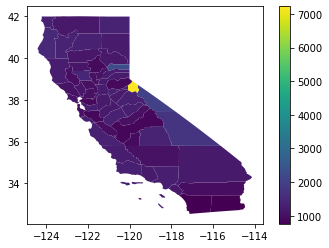

In [ ]:
CA_CTY_COL_2010_geo.plot('Collisions per Population', legend = True)

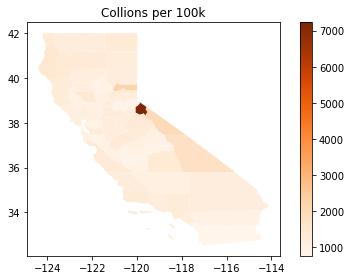

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
CA_CTY_COL_2010_geo.plot(column = "Collisions per Population", cmap = 'Oranges', legend = True ,ax = ax)
plt.title('Collions per 100k')
plt.tight_layout()
#ax.axis("off")
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
CA_CTY_COL_2010_geo['coords'] = CA_CTY_COL_2010_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
CA_CTY_COL_2010_geo['coords'] = [coords[0] for coords in CA_CTY_COL_2010_geo['coords']]

In [ ]:
CA_CTY_COL_2010_geo

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

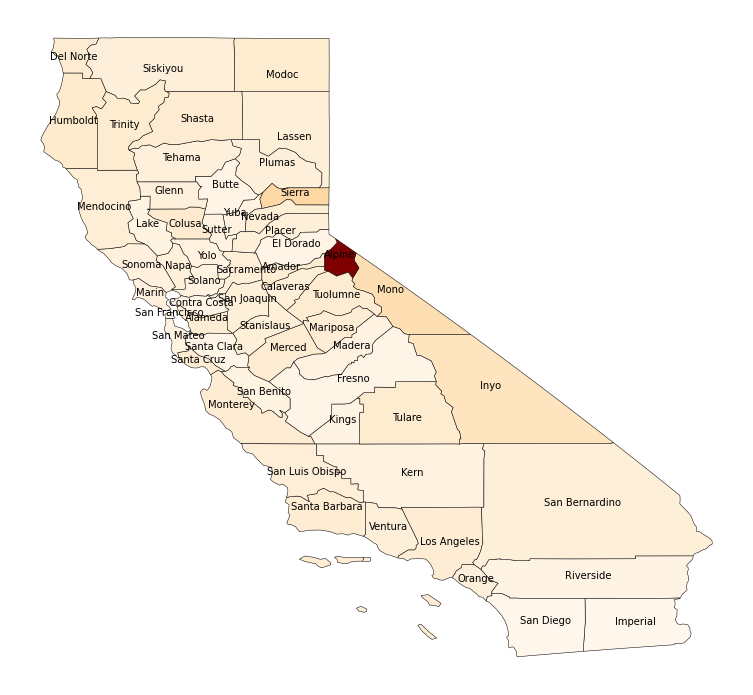

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)


CA_CTY_COL_2010_geo.plot(column = "Collisions per Population", cmap = 'OrRd', k = 7,  edgecolor='k', legend_kwds = {'shrink': .5}, ax = ax)
texts = [ax.text(row.coords[0], row.coords[1], s = row["NAME"], horizontalalignment = 'center') for idx, row in CA_CTY_COL_2010_geo.iterrows()]
plt.tight_layout()
ax.axis("off")
plt.savefig('myMap.png',dpi = 20, bbox_inches = 'tight')
plt.show()

In [ ]:
from google.colab import files

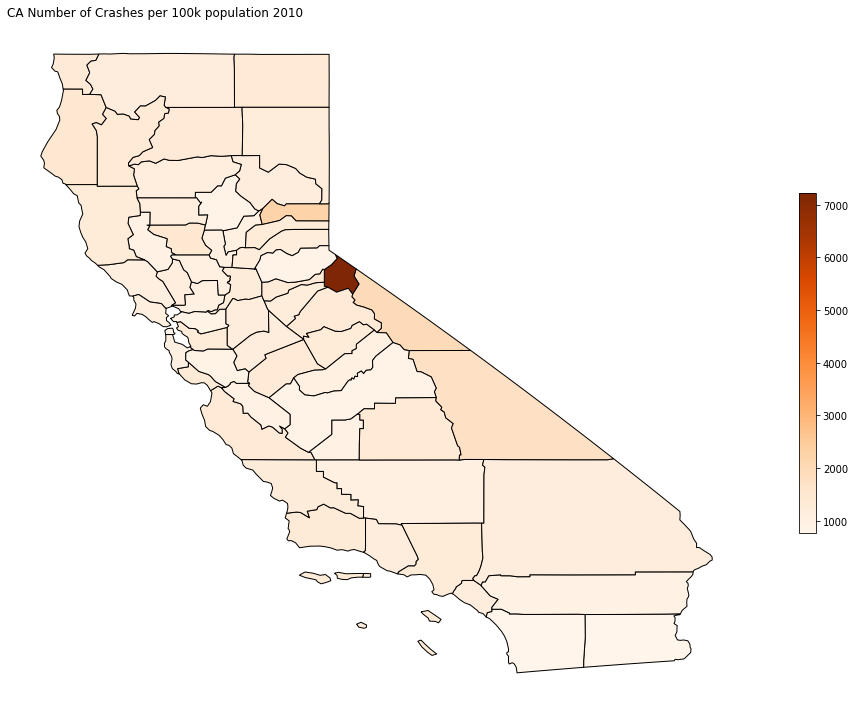

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)

CA_CTY_COL_2010_geo.plot(column = "Collisions per Population", cmap = 'Oranges', legend = True, edgecolor='k', legend_kwds = {'shrink': .5}, ax = ax)
#texts = [ax.text(row.coords[0], row.coords[1], s = row["NAME"], horizontalalignment = 'center') for idx, row in CA_CTY_COL_2010_geo.iterrows()]
plt.tight_layout()
ax.axis("off")
plt.title('CA Number of Crashes per 100k population 2010', loc = "left")
plt.savefig('CA1.png', dpi = 1300, bbox_inches = 'tight')
plt.show()

In [ ]:
files.download('CA1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

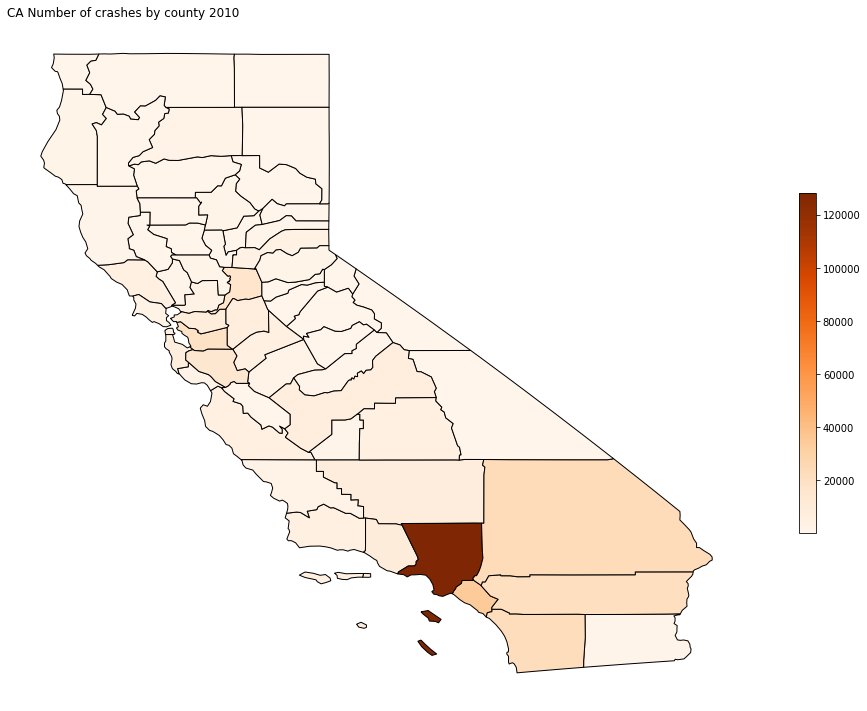

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)

CA_CTY_COL_2010_geo.plot(column = "COLLISIONS", cmap = 'Oranges', legend = True, edgecolor = 'k', legend_kwds = {'shrink': .5}, ax = ax)
#texts = [ax.text(row.coords[0], row.coords[1], s = row["NAME"], horizontalalignment = 'center') for idx, row in CA_CTY_COL_2010_geo.iterrows()]
plt.tight_layout()
ax.axis("off")
plt.title('CA Number of crashes by county 2010', loc = "left")
plt.savefig('CA_2010_county.png', dpi = 1300, bbox_inches = 'tight')
plt.show()

In [ ]:
files.download('CA_2010_county.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

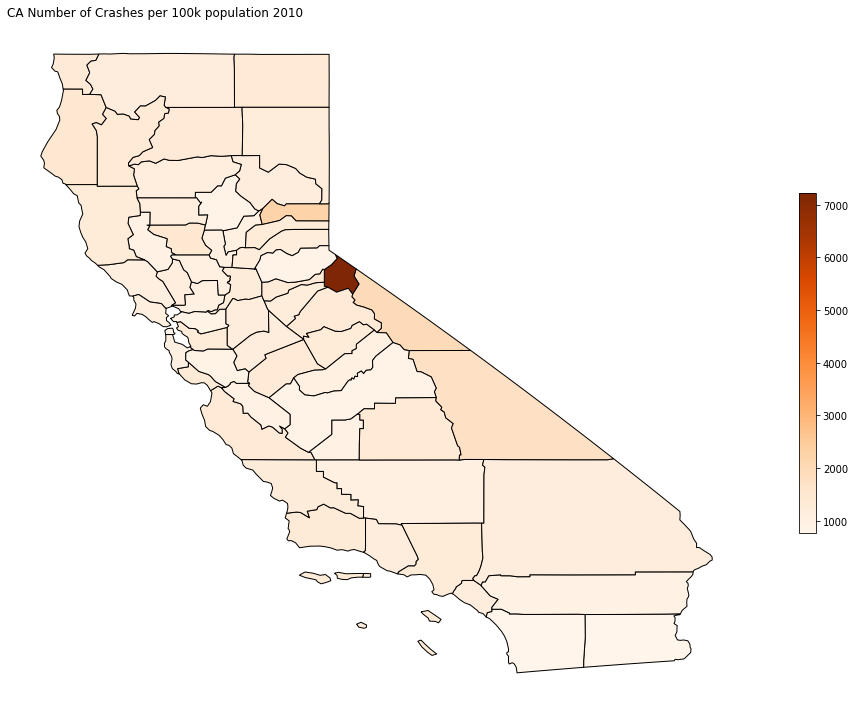

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)

CA_CTY_COL_2010_geo.plot(column = "Collisions per Population", cmap = 'Oranges', legend = True, edgecolor = 'k', legend_kwds = {'shrink': .5}, ax = ax)
#texts = [ax.text(row.coords[0], row.coords[1], s = row["NAME"], horizontalalignment = 'center') for idx, row in CA_CTY_COL_2010_geo.iterrows()]
plt.tight_layout()
ax.axis("off")
plt.title('CA Number of Crashes per 100k population 2010', loc = "left")
plt.savefig('CA_2010_POP.png', dpi = 1300, bbox_inches = 'tight')
plt.show()

In [ ]:
files.download('CA_2010_POP.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

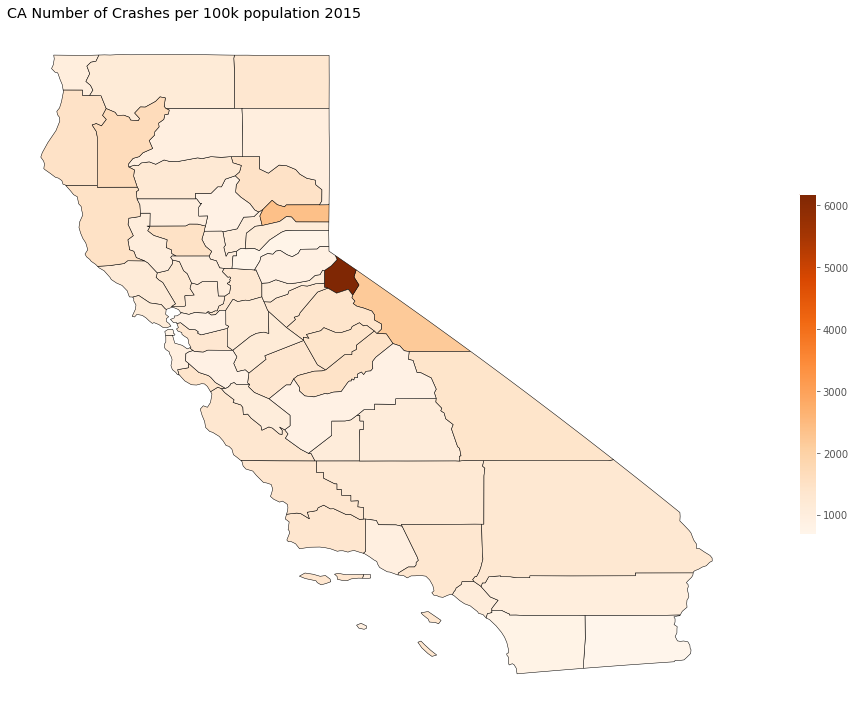

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)

CA_CTY_COL_2015_geo.plot(column = "Collisions per Population", cmap = 'Oranges', legend = True, edgecolor = 'k', legend_kwds = {'shrink': .5}, ax = ax)
#texts = [ax.text(row.coords[0], row.coords[1], s = row["NAME"], horizontalalignment = 'center') for idx, row in CA_CTY_COL_2010_geo.iterrows()]
plt.tight_layout()
ax.axis("off")
plt.title('CA Number of Crashes per 100k population 2015', loc = "left")
plt.savefig('CA_2015_POP.png', dpi = 1100, bbox_inches = 'tight')
plt.show()

In [ ]:
files.download('CA_2015_POP.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

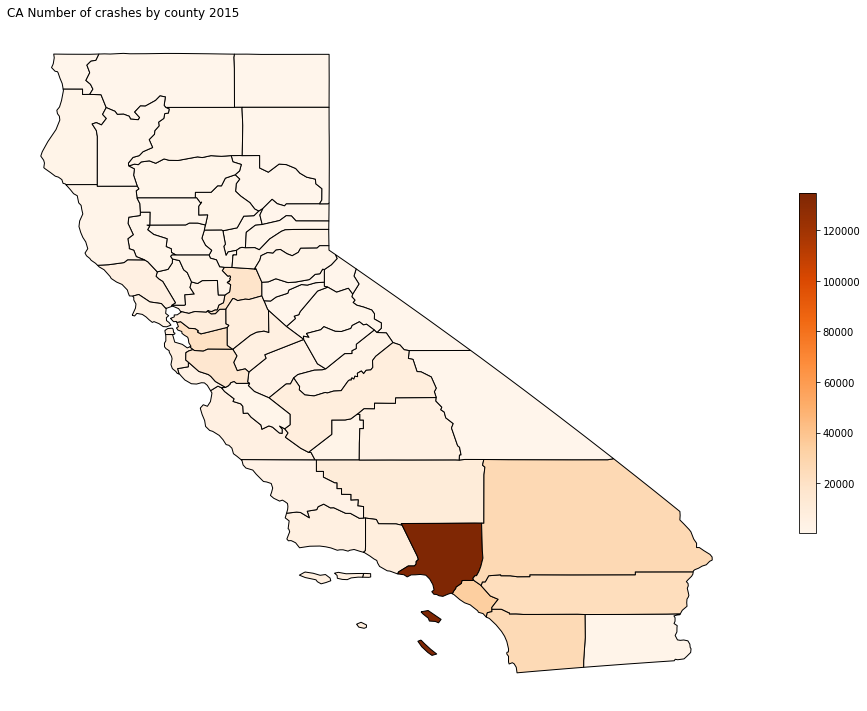

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)

CA_CTY_COL_2015_geo.plot(column = "COLLISIONS", cmap = 'Oranges', legend = True, edgecolor = 'k', legend_kwds = {'shrink': .5}, ax = ax)
#texts = [ax.text(row.coords[0], row.coords[1], s = row["NAME"], horizontalalignment = 'center') for idx, row in CA_CTY_COL_2010_geo.iterrows()]
plt.tight_layout()
ax.axis("off")
plt.title('CA Number of crashes by county 2015', loc = "left")
plt.savefig('CA_2015_county.png', dpi = 1300, bbox_inches = 'tight')
plt.show()

In [ ]:
files.download('CA_2015_county.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

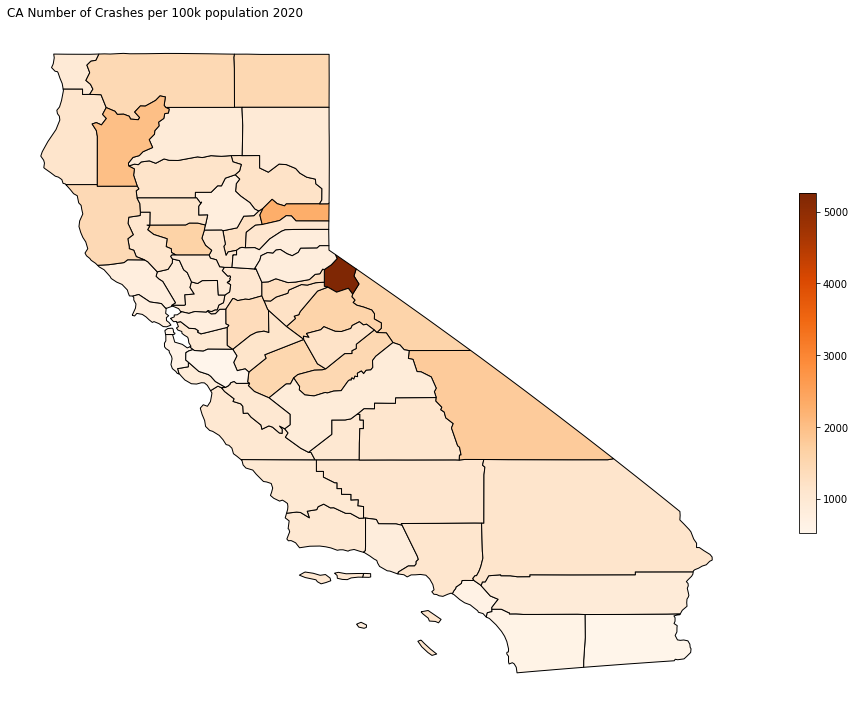

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)

CA_CTY_COL_2020_geo.plot(column = "Collisions per Population", cmap = 'Oranges', legend = True, edgecolor = 'k', legend_kwds = {'shrink': .5}, ax = ax)
#texts = [ax.text(row.coords[0], row.coords[1], s = row["NAME"], horizontalalignment = 'center') for idx, row in CA_CTY_COL_2010_geo.iterrows()]
plt.tight_layout()
ax.axis("off")
plt.title('CA Number of Crashes per 100k population 2020', loc = "left")
plt.savefig('CA_2020_POP.png', dpi = 1300, bbox_inches = 'tight')
plt.show()

In [ ]:
files.download('CA_2020_POP.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

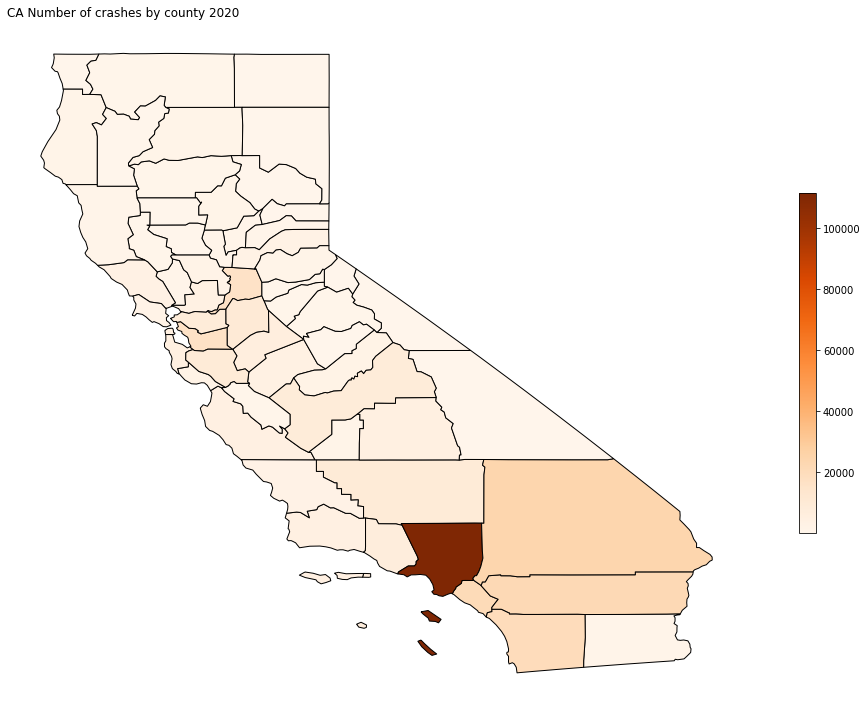

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)

CA_CTY_COL_2020_geo.plot(column = "COLLISIONS", cmap = 'Oranges', legend = True, edgecolor = 'k', legend_kwds = {'shrink': .5}, ax = ax)
#texts = [ax.text(row.coords[0], row.coords[1], s = row["NAME"], horizontalalignment = 'center') for idx, row in CA_CTY_COL_2010_geo.iterrows()]
plt.tight_layout()
ax.axis("off")
plt.title('CA Number of crashes by county 2020', loc = "left")
plt.savefig('CA_2020_COUNTY.png', dpi = 1200, bbox_inches = 'tight')
plt.show()

In [ ]:
files.download('CA_2020_COUNTY.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file = "file"

def pop_short(file):
  file["pop_abb"] = file["Population"] / 1000000
  return file

CA_CTY_COL_2010_geo_1 = pop_short(CA_CTY_COL_2010_geo)
CA_CTY_COL_2015_geo_1 = pop_short(CA_CTY_COL_2015_geo)
CA_CTY_COL_2020_geo_1 = pop_short(CA_CTY_COL_2020_geo)

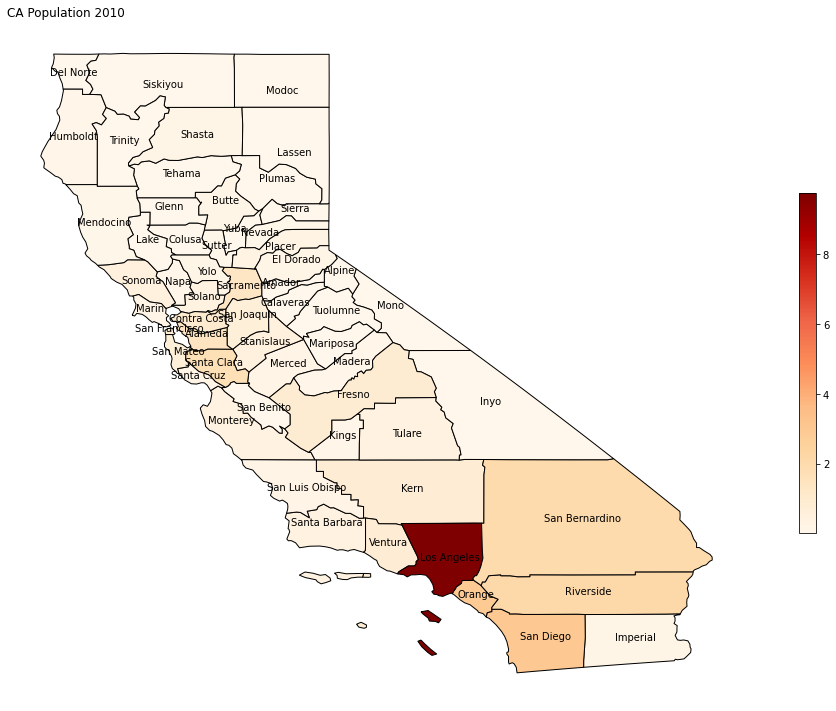

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)


CA_CTY_COL_2010_geo_1.plot(column = "pop_abb", cmap = 'OrRd', k = 7, legend = True,  edgecolor='k', legend_kwds = {'shrink': .5}, ax = ax)
texts = [ax.text(row.coords[0], row.coords[1], s = row["NAME"], horizontalalignment = 'center') for idx, row in CA_CTY_COL_2010_geo.iterrows()]
plt.tight_layout()
plt.ticklabel_format(style = 'plain')    # to prevent scientific notation.

ax.axis("off")
plt.title('CA Population 2010', loc = "left")
plt.savefig('CA_POP_CTY_2010.png', dpi = 1200, bbox_inches = 'tight')

plt.show()

In [ ]:
files.download('CA_POP_CTY_2010.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

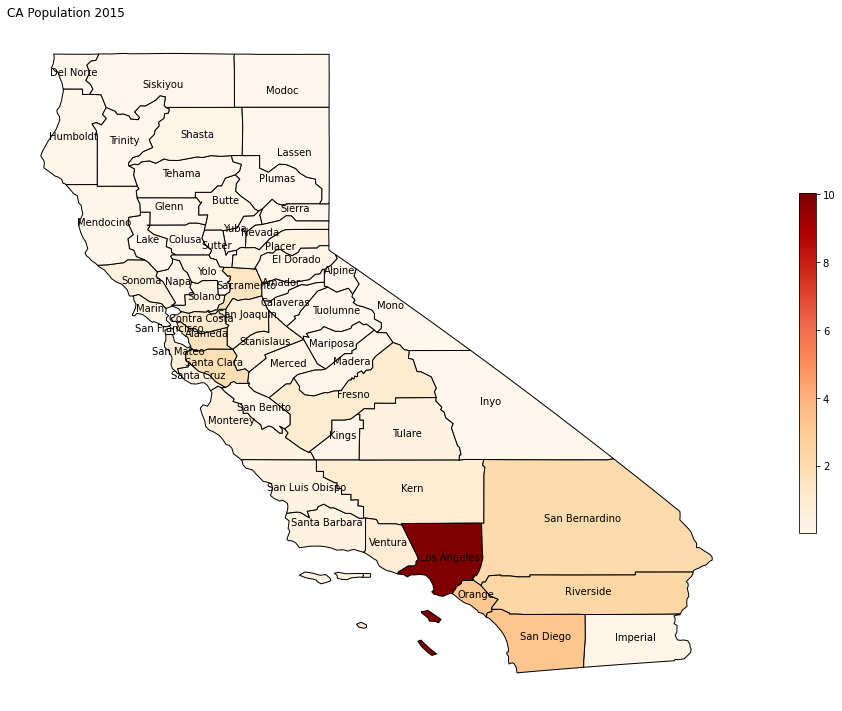

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)


CA_CTY_COL_2015_geo_1.plot(column = "pop_abb", cmap = 'OrRd', k = 7, legend = True,  edgecolor='k', legend_kwds = {'shrink': .5}, ax = ax)
texts = [ax.text(row.coords[0], row.coords[1], s = row["NAME"], horizontalalignment = 'center') for idx, row in CA_CTY_COL_2010_geo.iterrows()]
plt.tight_layout()
plt.ticklabel_format(style = 'plain')    # to prevent scientific notation.

ax.axis("off")
plt.title('CA Population 2015', loc = "left")
plt.savefig('CA_POP_CTY_2015.png', dpi = 1200, bbox_inches = 'tight')

plt.show()

In [ ]:
files.download('CA_POP_CTY_2015.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

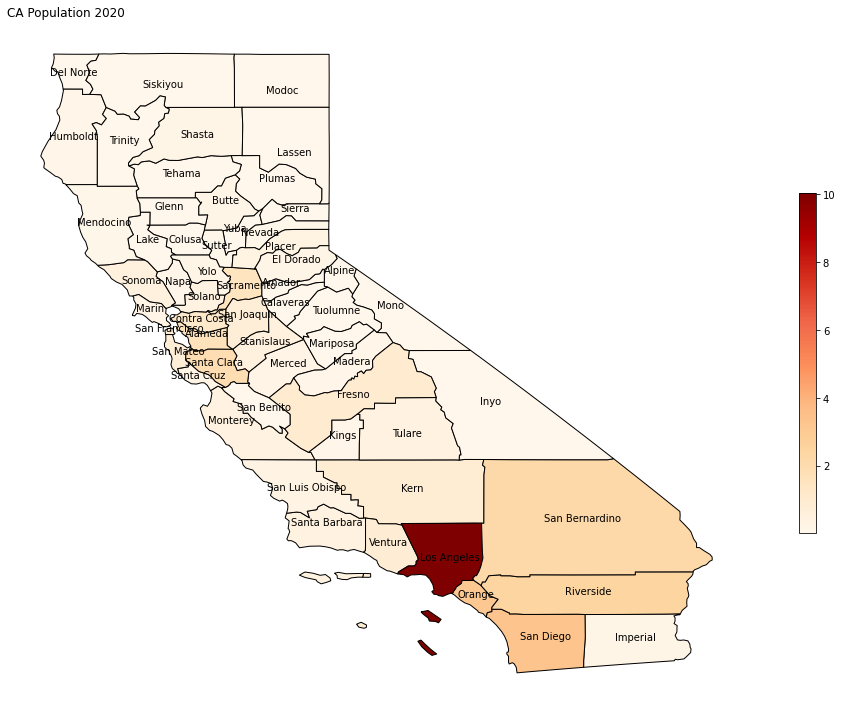

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left = 0.0)


CA_CTY_COL_2020_geo_1.plot(column = "pop_abb", cmap = 'OrRd', k = 7, legend = True,  edgecolor='k', legend_kwds = {'shrink': .5}, ax = ax)
texts = [ax.text(row.coords[0], row.coords[1], s = row["NAME"], horizontalalignment = 'center') for idx, row in CA_CTY_COL_2010_geo.iterrows()]
plt.tight_layout()
plt.ticklabel_format(style = 'plain')    # to prevent scientific notation.

ax.axis("off")
plt.title('CA Population 2020', loc = "left")
plt.savefig('CA_POP_CTY_2020.png', dpi = 1200, bbox_inches = 'tight')

plt.show()

In [ ]:
files.download('CA_POP_CTY_2020.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>